MDE Techniken
Omnilab ist MDe

Code generation 
MDE ander beschrieben asl MBSE
MDE eher inklusiv

digital thread
digital companion

Threads to validity -- Model driven begriff-> what did we do?
geometric kinematics

logical vs physical why
AutomationML


Code generation meistens mit Modellen, die SE beschreiben

- bei domain_slcp_barchart und domain_tt_barchart sind außerdem die legenden-Werte abgeschnitten
- domain_tt_barchart beinhaltet übrigens glaube ich NICHT die TTs, sondern was andres



- TTs und Domains: einheitliche Sortierung der einzelnen TTs/Domänen über verschiedene Grafiken hinweg 
- Generell: einheitliche Größe der Grafiken
- Domains: würde hier in den detaillierteren Grafiken nur mehr folgende Domänen verwenden: Manufacturing, Transportation and Storage, Accomodation. Eventuell noch Electricity und Education, aber die haben halt nur 4 und 3 Ergebnisse insgesamt...würd ich eher auch weglassen


- full json TODO... dann generate all again

# packages

In [238]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install("pandas")
install("numpy")
install("matplotlib")

In [239]:
destination_folder = 'target/img/1/'
fileformat = ".pdf"

In [240]:
figwidth = 12
figheight = 8
barlabelsize = 18

# imports

In [241]:
import pandas as pd
import numpy as np
import json
import csv
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from textwrap import wrap


In [242]:
params = {'legend.fontsize': 'x-large',
        'axes.labelsize':'x-large',
        'axes.titlesize':'x-large',
        'xtick.labelsize':'x-large',
        'ytick.labelsize':'x-large',
        'font.size': 13}
for key in params:
        plt.rcParams[key] = params[key]

# Read data variable from csv

In [243]:
df = pd.read_csv(filepath_or_buffer="data/04 extraction consolidation results_reduced.csv", sep=";")
result = df['Title'].to_list()
result = list(dict.fromkeys(result))
titles = list(df.columns)
metadata = pd.read_csv("./data/search_results.csv", sep=";", encoding="latin-1")
metadata = metadata.drop_duplicates(subset=['Title'])
data = df.merge(metadata, how='left', on='Title')
yeardata = data.drop_duplicates('Title')
yeardata = yeardata[yeardata['Title'].notna()]
yeardata = yeardata.reset_index()

del metadata
del df
del titles

In [244]:
df2 = pd.read_csv("data/04 extraction consolidation results_reduced.csv", sep="|")

In [245]:
yearless = {'A digital twin-driven hybrid approach for the prediction of performance degradation in transmission unit of CNC machine tool':2022,
'A framework for Model-Driven Engineering of resilient software-controlled systems':2021,
'A framework for Model-Driven Engineering of resilient software-controlled systems':2021,
'A Methodology for Digital Twin Modeling and Deployment for Industry 4.0':2020,
'AML4DT: A Model-Driven Framework for Developing and Maintaining Digital Twins with AutomationML':2021,
'Closed-Loop Systems Engineering (CLOSE): Integrating Experimentable Digital Twins with the Model-Driven Engineering Process':2018,
'Combining Low-Code Programming and SDL-Based Modeling with Snap! in the Industry 4.0 Context':2021,
'DataTime: a Framework to smoothly Integrate Past, Present and Future into Models':2021,
'Digital Behavioral Twins for Safe Connected Cars':2018,
'Digital Twin of an Electrical Motor Based on Empirical Performance Model':2020,
'Ensuring consistency in scalable-detail models for DT-based control':2021,
'Generating customized low-code development platforms for digital twins':2022,
'Generative and Model-driven SDK development for the Industrie 4.0 Digital Twin':2021,
'Interface Development for Digital Twin of an Electric Motor Based on Empirical Performance Model':2022,
'Knowledge driven rapid development of white box digital twins for industrial plant systems':2021,
'Meta-model-based shop-floor digital twin architecture, modeling and application':2023,
'Model-Driven Development of a Digital Twin for Injection Molding':2020,
'Model-driven engineering city spaces via bidirectional model transformations':2021,
'Supporting Digital Twins for the Retrofit in Aviation by a Model-Driven Data Handling':2023,
'Supporting the Implementation of Digital Twins for IoT-Enhanced BPs':2023,
'The Framework for Designing Autonomous Cyber-Physical Multi-agent Systems for Adaptive Resource Management':2019,
'The OMiLAB Digital Innovation environment: Agile conceptual models to bridge business value with Digital and Physical Twins for Product-Service Systems development':2022,
'Towards a Model-Driven Architecture for Interactive Digital Twin Cockpits':2020,
'Using UML and OCL Models to Realize High-Level Digital Twins':2021}

In [246]:
for index, row in yeardata.iterrows():
    if pd.isna(row['Publication Year']):

        print(row['Title'])
    if row['Title'] in yearless.keys():
        if pd.isna(row['Publication Year']):
            yeardata.at[index, 'Publication Year'] = yearless[row['Title']]

A digital twin-driven hybrid approach for the prediction of performance degradation in transmission unit of CNC machine tool
Supporting Digital Twins for the Retrofit in Aviation by a Model-Driven Data Handling
Supporting the Implementation of Digital Twins for IoT-Enhanced BPs


In [247]:
data.columns

Index(['Title', 'model processing technique', 'source', 'source category',
       'source sub-category 1', 'source sub-category 2',
       'source model target category', 'target', 'target category',
       'target category 2', 'target sub-category 1', 'target sub-category 2',
       'target model target category', 'use case domain',
       'system lifecycle phase', 'twinning target', 'twin lifecycle phase',
       'Technological Readiness Level', 'Use Case', 'Publication Title',
       'Authors', 'Publication Year', 'Document Identifier', 'Publisher'],
      dtype='object')

In [248]:
#data.drop(['model processing technique', 'source', 'source category', 'source sub-category', 'source model target category', 'target', 'target category', 'target sub-category', 'target model target category', 'use case domain', 'system lifecycle phase', 'twinning target', 'twin lifecycle phase', 'Technological Readiness Level'], axis=1, inplace=True)

In [249]:
data = data[data['Title'].notna()]

In [250]:
data.shape

(105, 24)

In [251]:
yeardata.shape

(47, 25)

In [252]:
df2.shape

(106, 1)

In [253]:
#df2.drop(['Title'], axis=1, inplace=True)

In [254]:
#df2 = df2.reset_index()

In [255]:
#data = data.reset_index()

In [256]:
#data = pd.merge(data, df2, on ='index')

data.head()

# Create Individual Barcharts

occurrences_df = data["model processing technique"].value_counts().reset_index()
occurrences_df.columns = ['entry', 'count']
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(occurrences_df['entry'], occurrences_df['count'])
plt.ylabel('#Papers')
plt.title('# Papers per model processing technique')
plt.xticks(rotation=90)  # Rotate the x-axis labels if they are too long
plt.tight_layout()

plt.show()

data["modeling language"].value_counts()

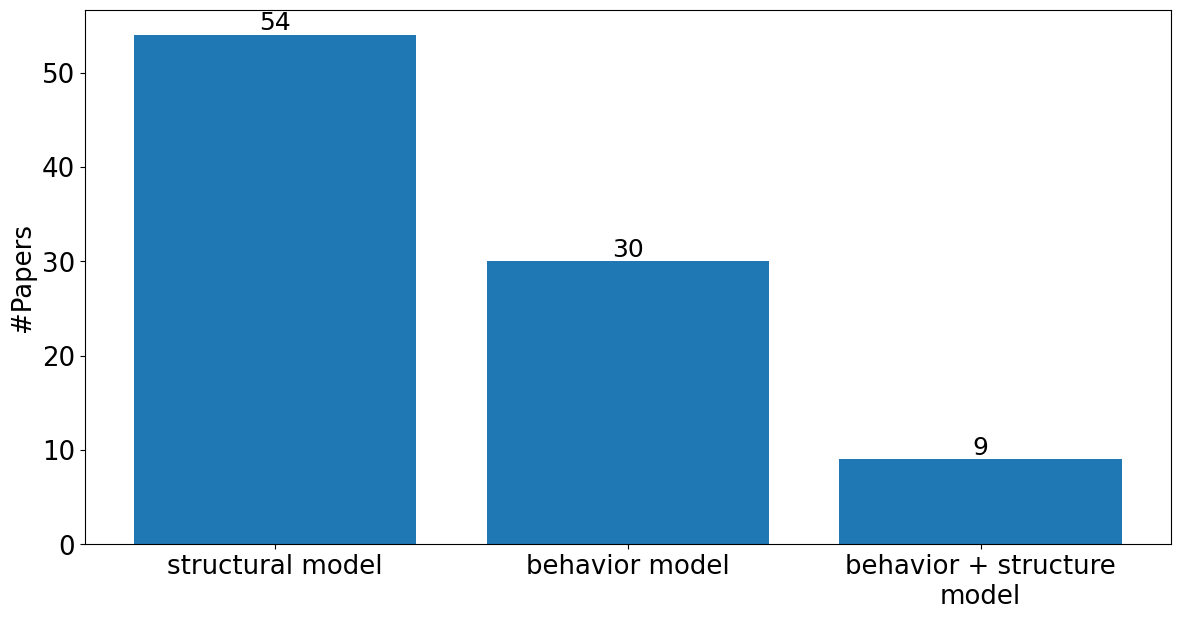

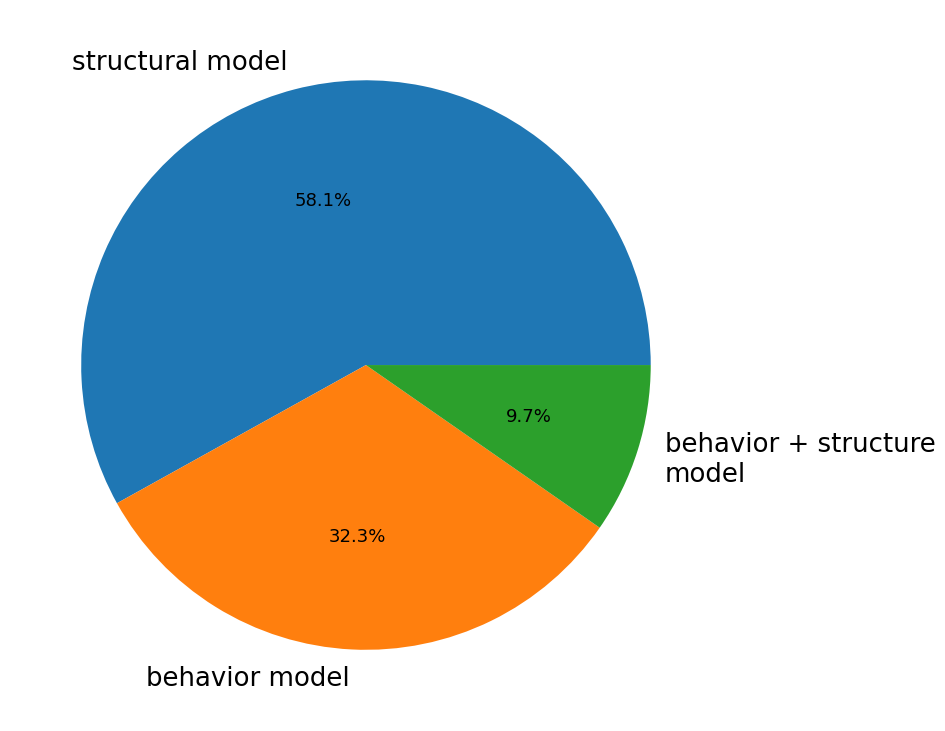

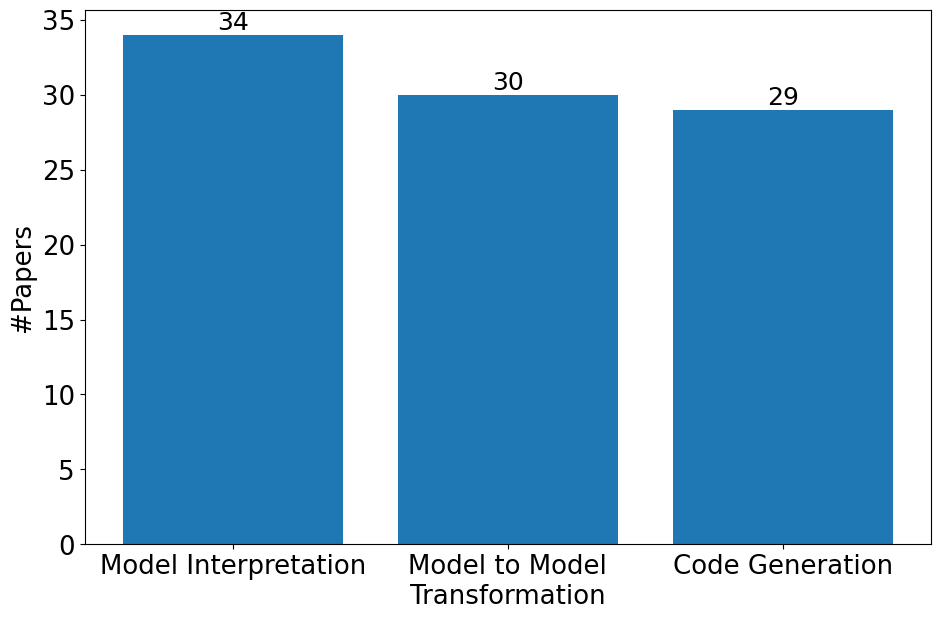

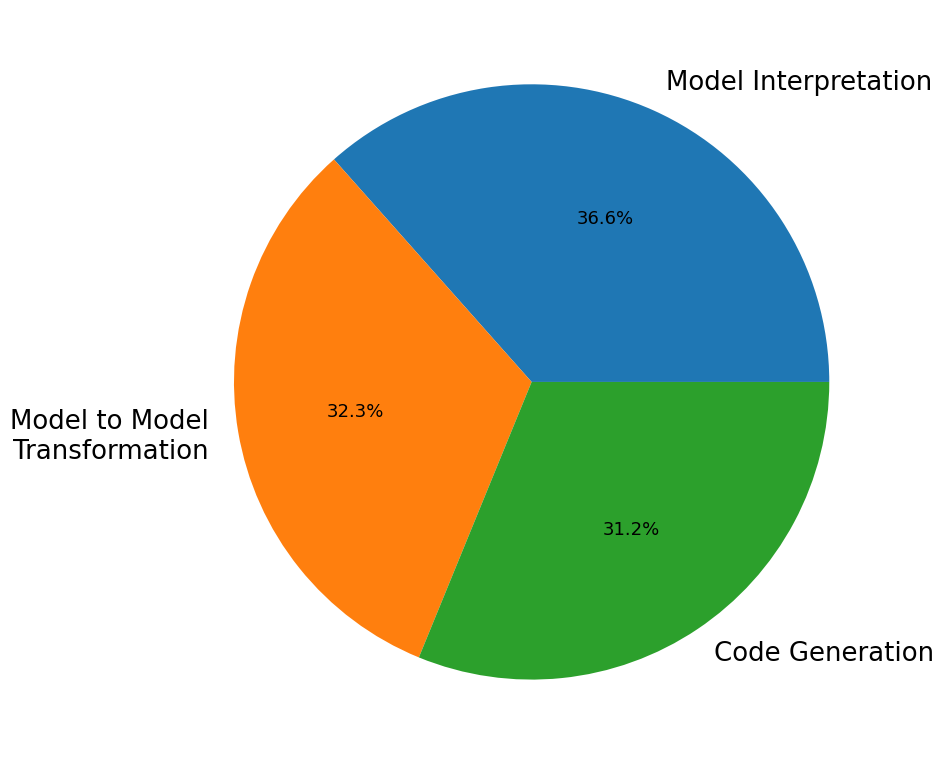

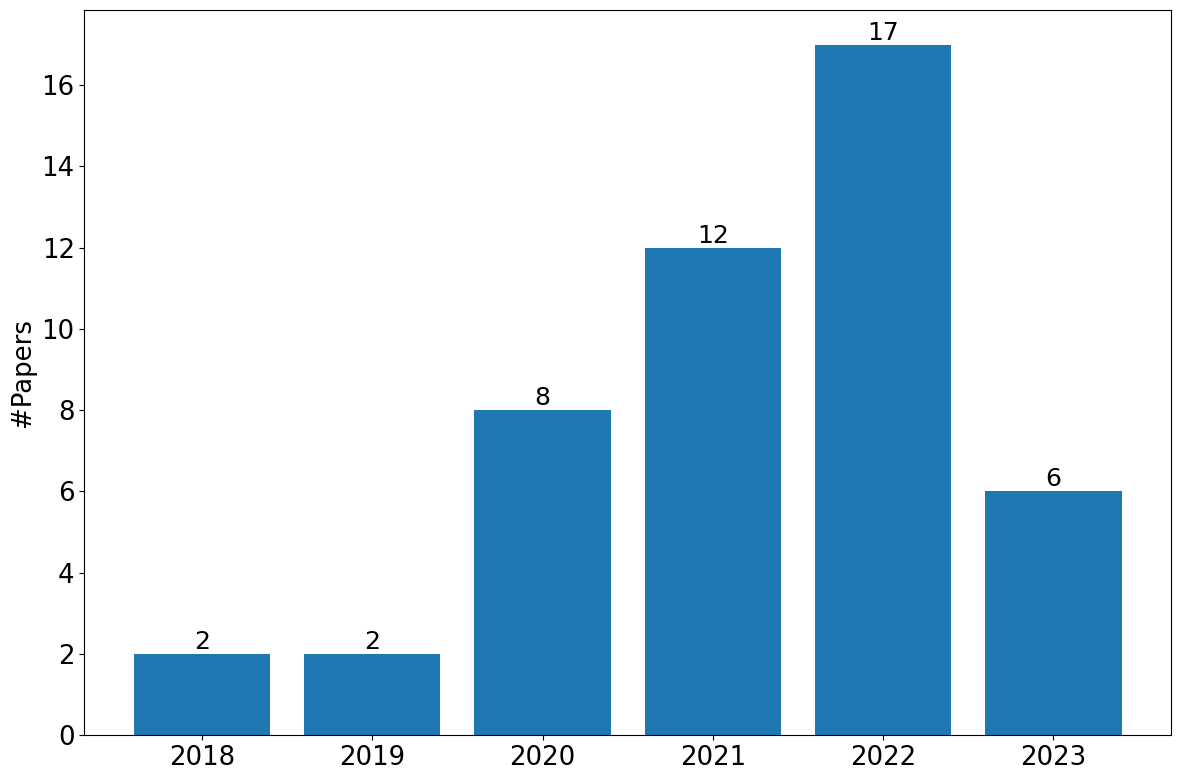

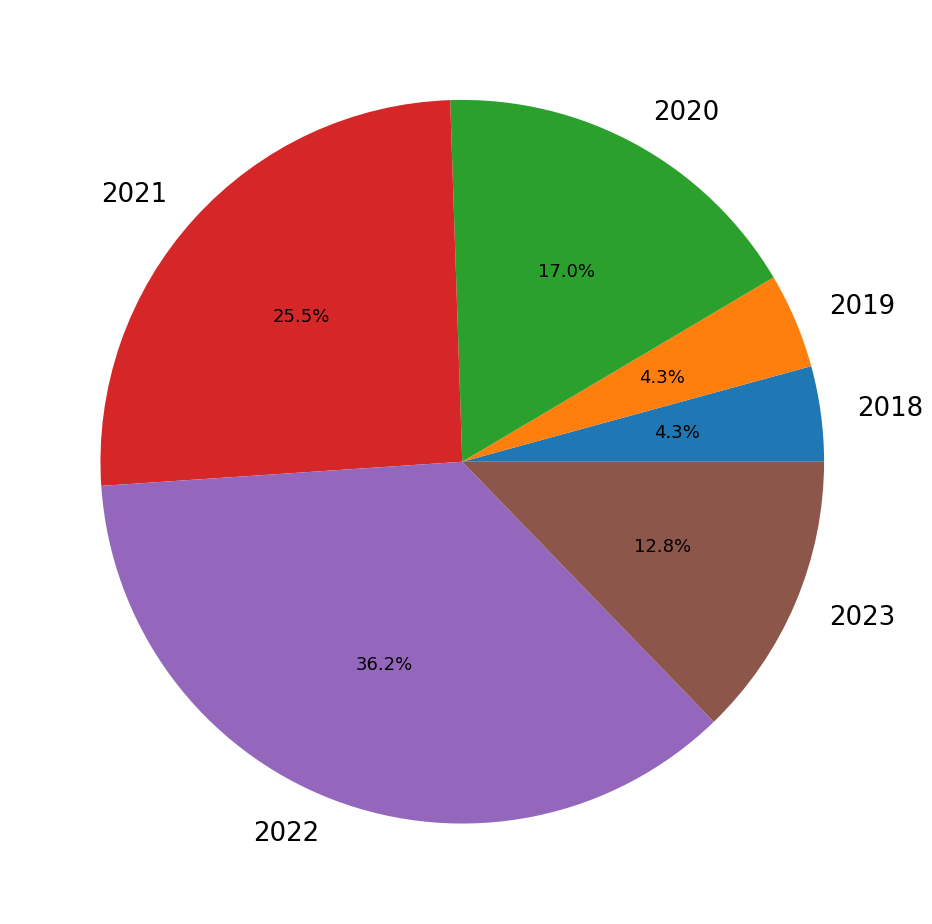

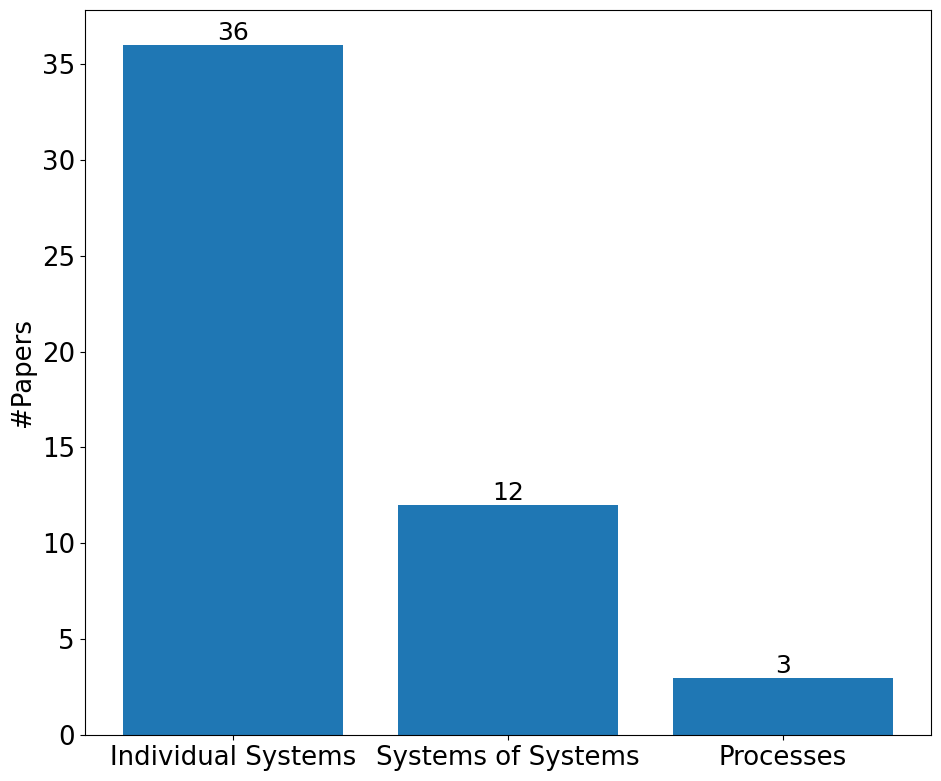

In [257]:
modeling_language = data["source category"].value_counts().reset_index()
modeling_language.columns = ['entry', 'count']
modeling_language  = modeling_language[modeling_language['count'] > 1]
mde_technique= data["model processing technique"].value_counts().reset_index()
mde_technique.columns = ['entry', 'count']
use_case_domain = data["use case domain"].value_counts().reset_index()
use_case_domain.columns = ['entry', 'count']
system_lcp = data["system lifecycle phase"].value_counts().reset_index()
system_lcp.columns = ['entry', 'count']
twinning_target = data["twinning target"].value_counts().reset_index()
twinning_target.columns = ['entry', 'count']
twin_lcp= data["twin lifecycle phase"].value_counts().reset_index()
twin_lcp.columns = ['entry', 'count']
trl = data["Technological Readiness Level"].value_counts().reset_index()
trl.columns = ['entry', 'count']


yeardata = yeardata.fillna(value={'Publication Year':"0"})
years = yeardata["Publication Year"].value_counts().reset_index()
years.columns = ['entry', 'count']
years['entry'] = years['entry'].astype(int).astype(str)
years['entry'].replace('0', "NAN")

tt = data["twinning target"].value_counts().reset_index()
tt.columns = ['entry', 'count']

fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight*0.8)
# List of DataFrames
dataframes = [modeling_language, mde_technique, years, tt]
# Titles for each subplot (modify as needed)
titles = ['#Papers per Modeling Language', '#Papers per MDE technique', '#Papers per year', '#Papers per twinning target']

# Loop through the subplots and plot each bar chart
plot_data = dataframes[0]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[0])
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#Papers")

# Adjust the layout to avoid overlapping titles

#plt.show()
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"MDE_Lang_barchart"+ fileformat)

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figwidth*0.8)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[0]
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.pie(plot_data['count'], labels=entry_data, autopct='%1.1f%%')
#axes.set_title(titles[0])
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"MDE_Lang_piechart"+ fileformat)

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figheight*0.8)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[1]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[1])
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#Papers")
#plt.show()
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"MDE_barchart"+ fileformat)


fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figwidth*0.8)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[1]
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.pie(plot_data['count'], labels=entry_data, autopct='%1.1f%%')
#axes.set_title(titles[1])
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"MDE_piechart"+ fileformat)

fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[2]
plot_data.sort_values('entry', inplace=True)
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_ylabel("#Papers")
#axes.set_title(titles[2])
#entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)

# Adjust the layout to avoid overlapping titles

#plt.show()
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"Year_barchart"+ fileformat)
# plt.savefig(destination_folder+"3 Papers per Year"+ fileformat) - don't use for now

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figwidth*0.8)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[2]
plot_data.sort_values('entry', inplace=True)
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.pie(plot_data['count'], labels=entry_data, autopct='%1.1f%%')
#axes.set_title(titles[2])
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"Year_piechart"+ fileformat)
# plt.savefig(destination_folder+"3 Papers per Year"+ fileformat)  - don't use for now

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figheight)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[3]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[3])
#entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#Papers")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"TT_barchart"+ fileformat)


In [258]:
# List of DataFrames
dataframes = [use_case_domain, system_lcp, twinning_target, twin_lcp, trl]
# Titles for each subplot (modify as needed)
titles = ['#Papers per Use Case Domain', '#Papers per System LCP', '#Papers per Twinning Target', '#Papers per Twin LCP', '#Papers per TRL']


In [259]:
import re

C:\Users\ac130903\AppData\Local\Temp\ipykernel_29920\2784957179.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(entry_data, rotation=90)


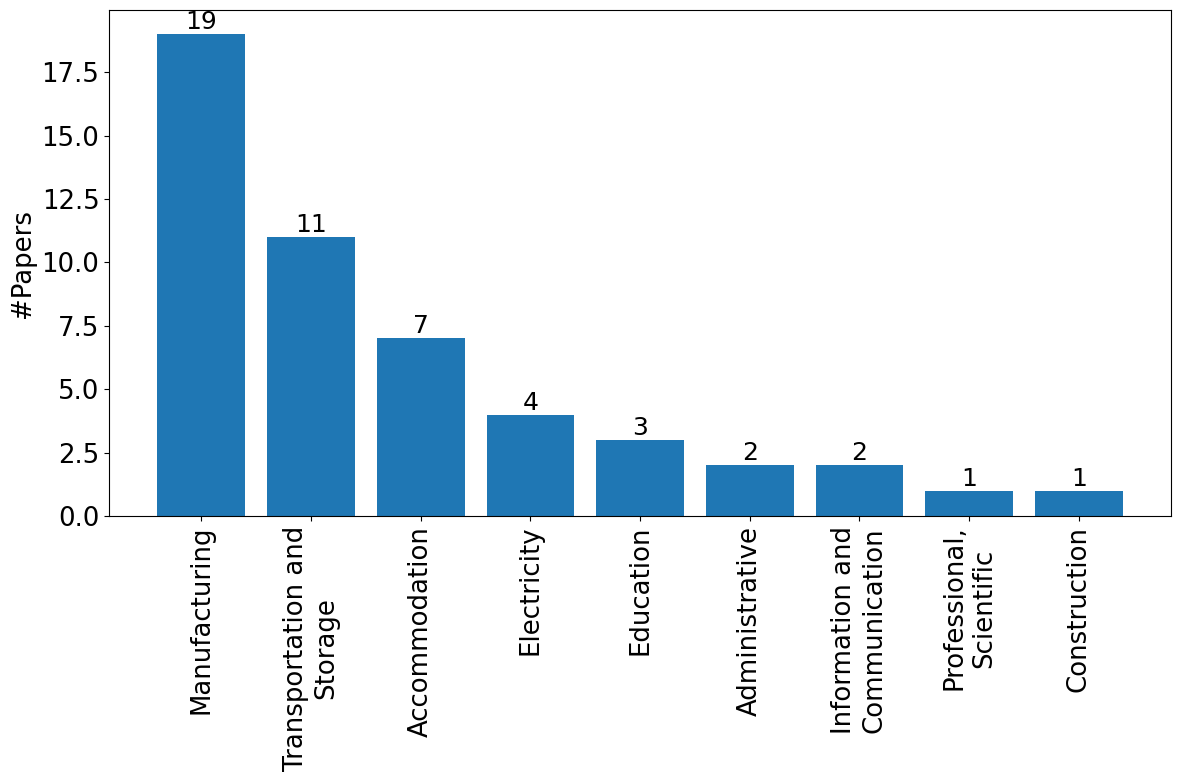

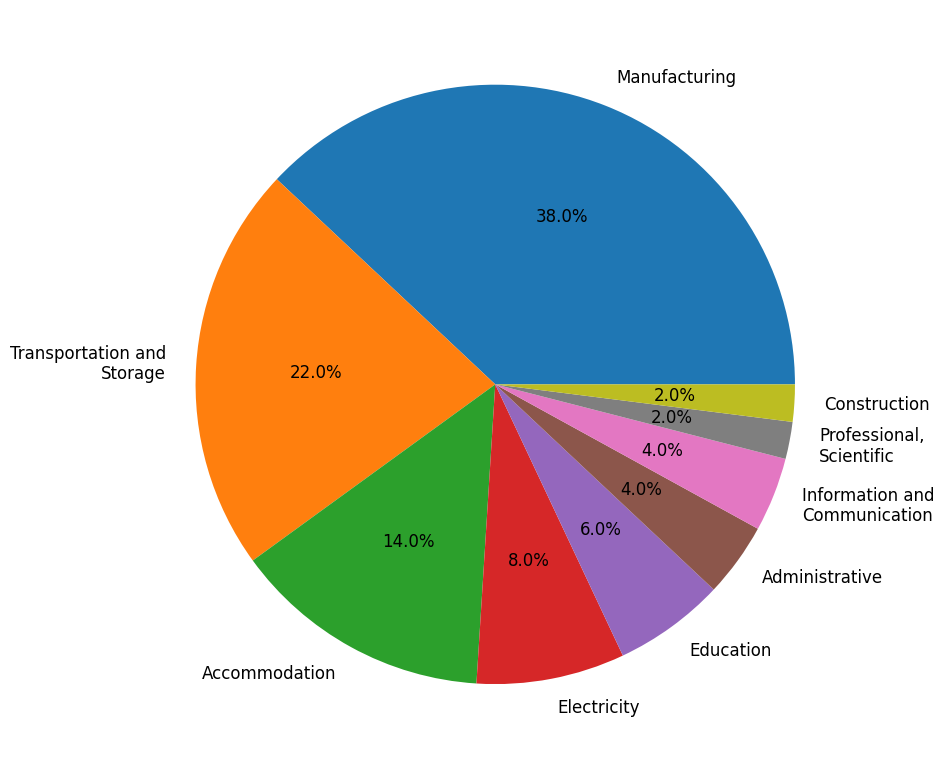

In [260]:
fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
plot_data = dataframes[0]

entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.bar(entry_data, plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[0])
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#Papers")
plt.tight_layout()
plt.savefig(destination_folder+"domain_barchart"+ fileformat)


fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figwidth*0.8)
# Loop through the subplots and plot each bar chart
plot_data = dataframes[0]
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.pie(plot_data['count'], labels=entry_data, autopct='%1.1f%%',textprops={'fontsize': 12})
#axes.set_title(titles[0])
plt.tight_layout()
plt.savefig(destination_folder+"domain_piechart"+ fileformat)

As-Designed
As-Operated


C:\Users\ac130903\AppData\Local\Temp\ipykernel_29920\2052165929.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(entry_data, rotation=90)


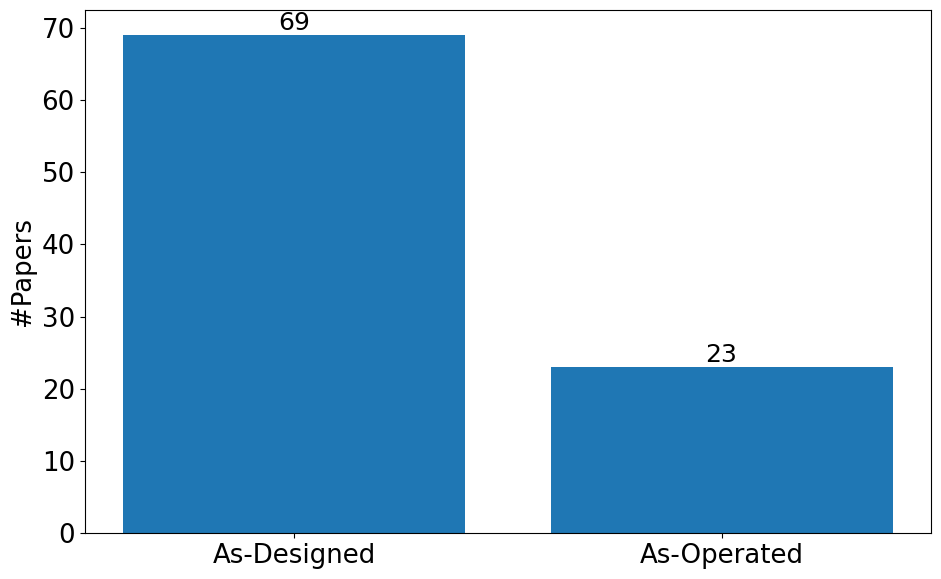

In [261]:
fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figwidth*0.5)
plot_data = dataframes[3]#.groupby(['entry']).filter(lambda x: len(x)>1)

for index, row in plot_data.iterrows():
    if ";" in row['entry']:
        values = row['entry'].split(";")
        for val in values:
            for index2, row2 in plot_data.iterrows():
                if row2['entry'] == val:
                    #change value by +1
                    print(row2['entry'])
                    plot_data.loc[plot_data['entry'].isin([row2['entry']]), 'count']+=1
        plot_data.drop(index, inplace=True)

axes.bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[3])
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#Papers")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"TLCP_barchart"+ fileformat)

C:\Users\ac130903\AppData\Local\Temp\ipykernel_29920\56200274.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(plot_data['entry'], rotation=90)


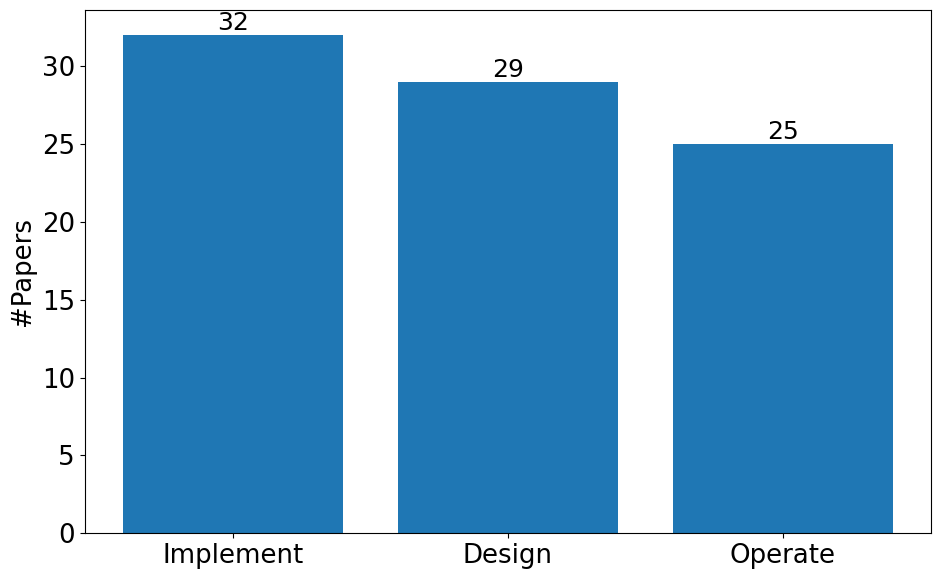

In [262]:
fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figwidth*0.5)
plot_data = dataframes[1]
plot_data = plot_data[plot_data['count'] > 2] 
axes.bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[1])
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#Papers")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"SLCP_barchart"+ fileformat)

C:\Users\ac130903\AppData\Local\Temp\ipykernel_29920\2183845940.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(entry_data, rotation=90)


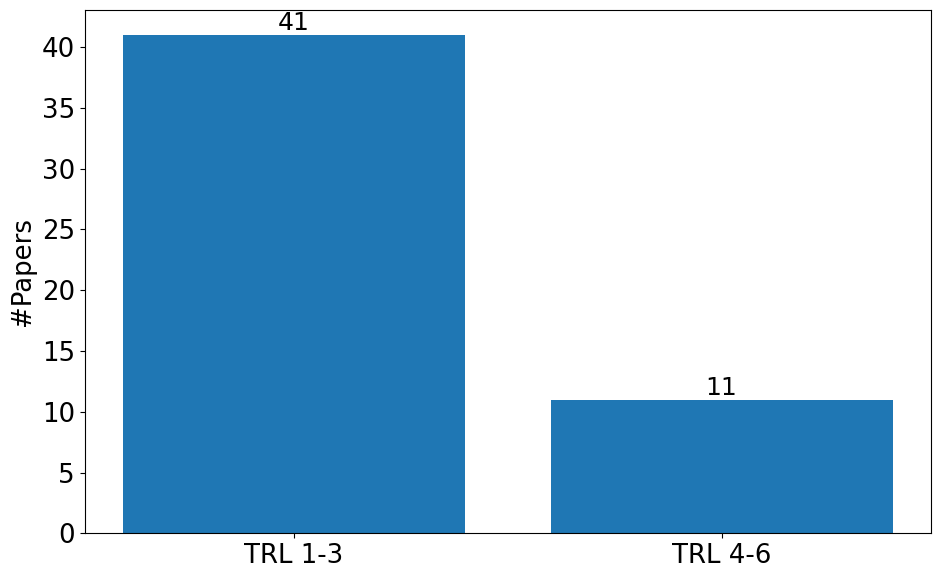

In [263]:


fig, axes = plt.subplots()
fig.set_figwidth(figwidth*0.8)
fig.set_figheight(figwidth*0.5)
plot_data = dataframes[4]
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.bar(entry_data, plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
#axes.set_title(titles[4])
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0], fontsize=barlabelsize)
axes.set_ylabel("#Papers")
# Adjust the layout to avoid overlapping titles
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(destination_folder+"TRL_barchart"+ fileformat)


In [264]:
domains = ['Accommodation', 'Electricity', 'Manufacturing', 'Transportation and Storage']

# Stacked Barcharts with MDE technique per X

occurrences_df = data["modeling language"].value_counts().reset_index()
occurrences_df.columns = ['entry', 'count']
occurrences_df = occurrences_df[occurrences_df['count'] > 1]
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(occurrences_df['entry'], occurrences_df['count'])
plt.ylabel('#Papers')
plt.title('# Papers per modeling language')
plt.xticks(rotation=90)  # Rotate the x-axis labels if they are too long
plt.show()

In [265]:
figheight = 6

In [266]:
import re

C:\Users\ac130903\AppData\Local\Temp\ipykernel_29920\1869233533.py:59: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
C:\Users\ac130903\AppData\Local\Temp\ipykernel_29920\1869233533.py:80: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
C:\Users\ac130903\AppData\Local\Temp\ipykernel_29920\1869233533.py:103: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
se

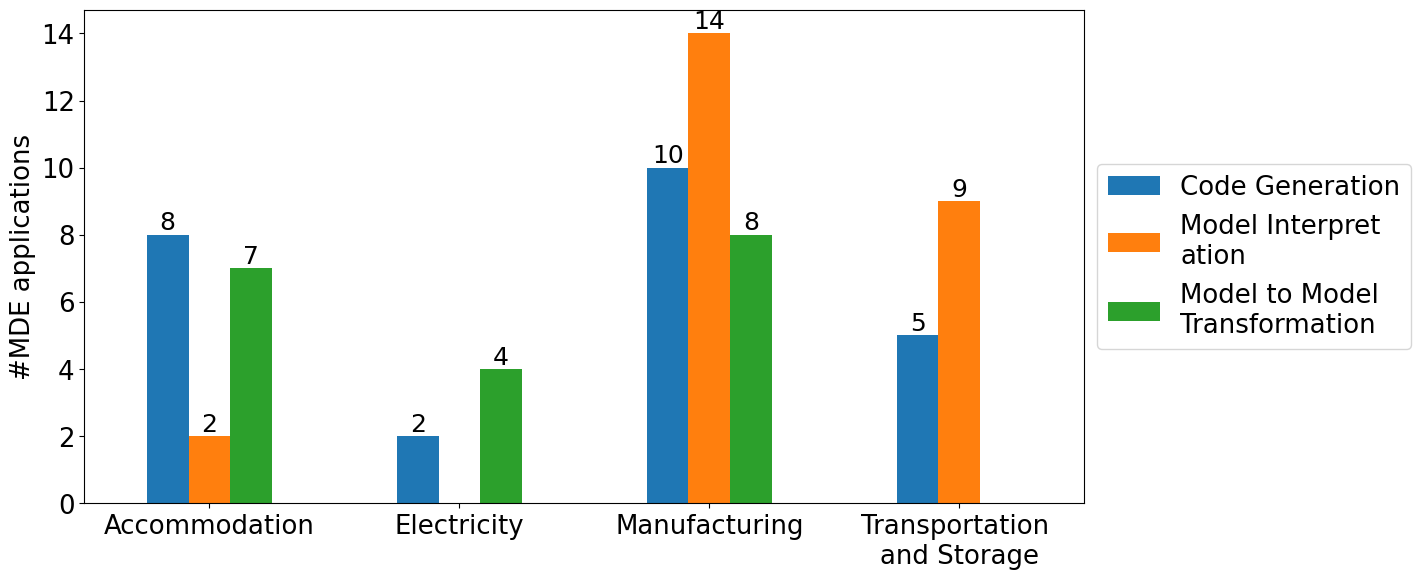

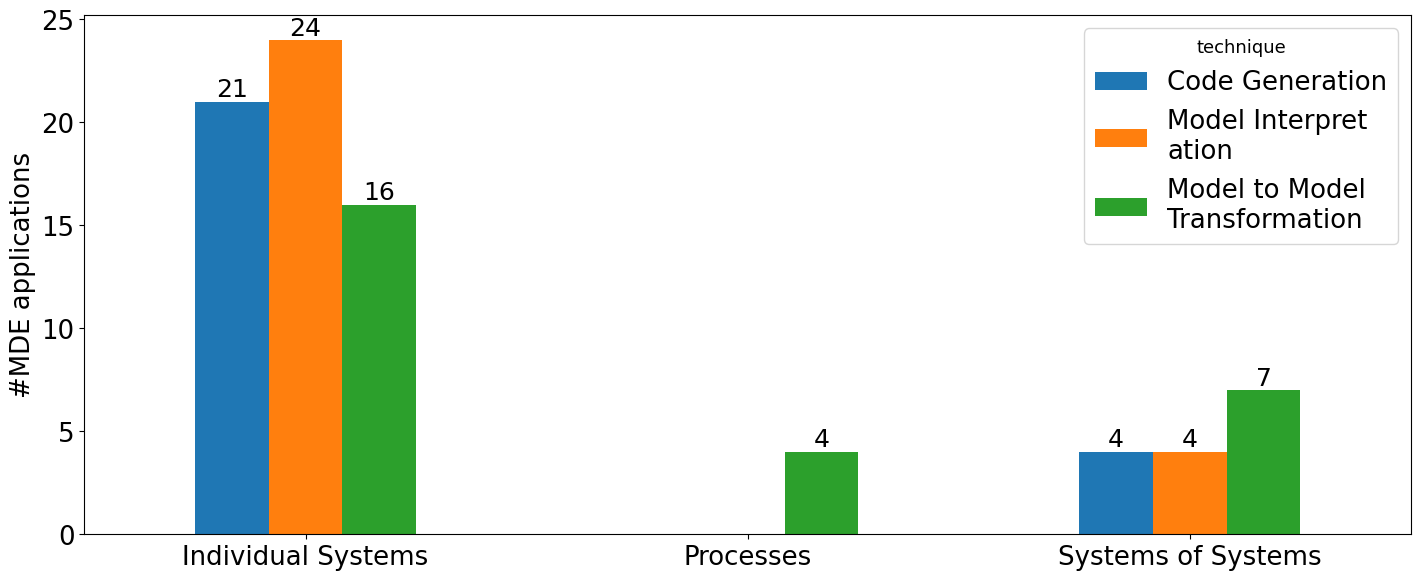

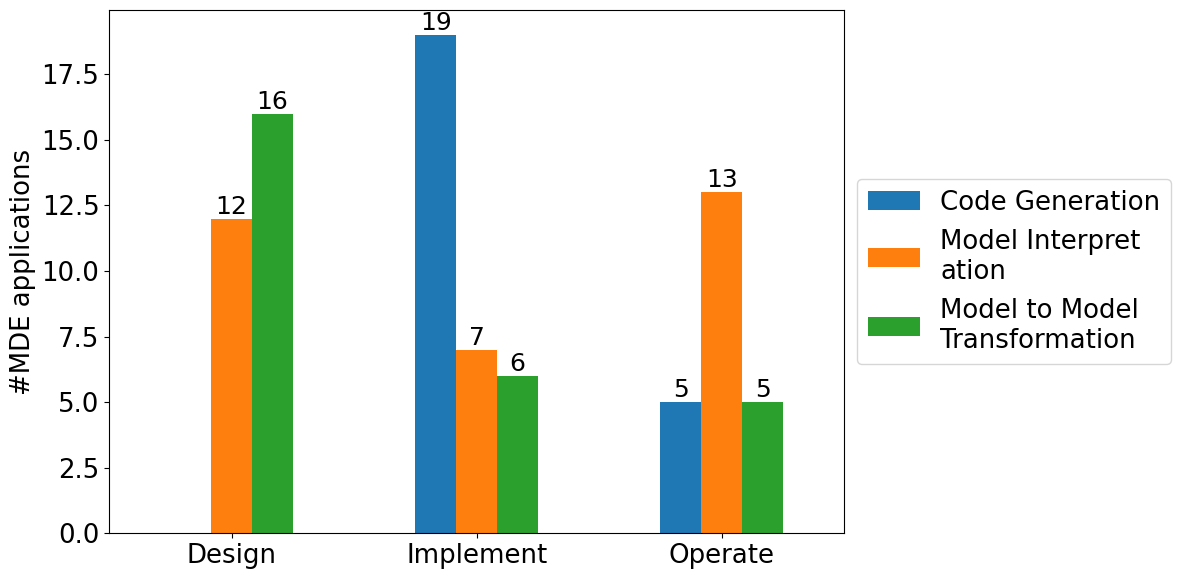

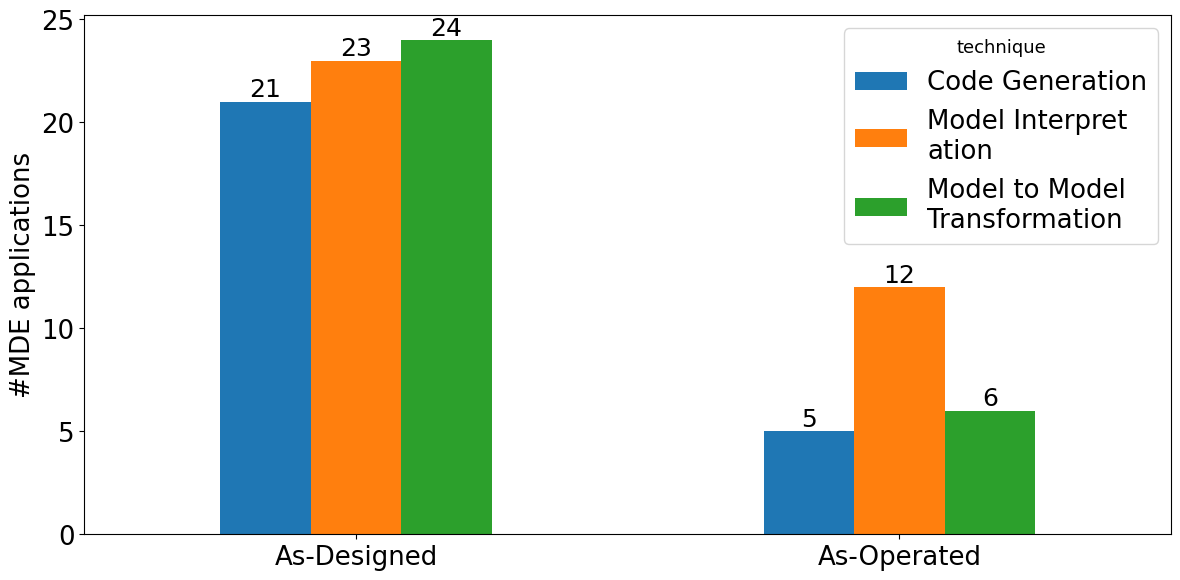

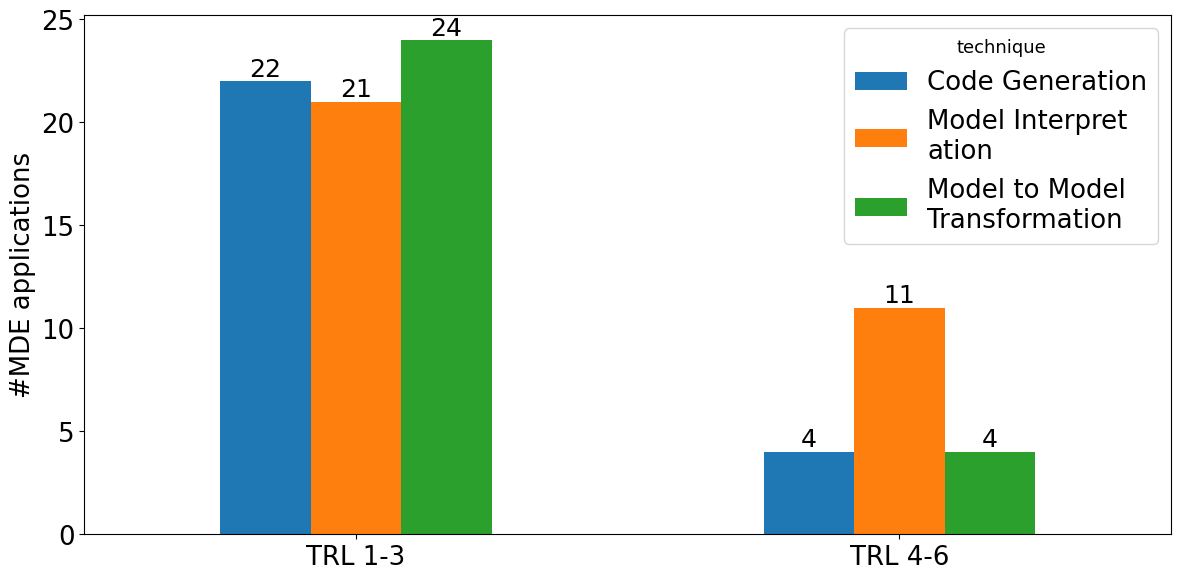

In [267]:
domains_techniques = pd.DataFrame(columns = ['value', 'technique'])
system_lcp_techniques = pd.DataFrame(columns = ['value', 'technique'])
twin_lcp_techniques = pd.DataFrame(columns = ['value', 'technique'])
twinning_target_techniques = pd.DataFrame(columns = ['value', 'technique'])
trl_techniques = pd.DataFrame(columns = ['value', 'technique'])

with open("target/json/data_consolidated_semistructured__4.json", 'r') as json_file:
    data_semistr = json.load(json_file)

#add syslifecycle and twin lifecycle
# in one graphic
mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    domain = contents["use case domain"] if contents["use case domain"] in domains else None
    trl = contents["Technological Readiness Level"]
    twinning_target = contents["twinning target"]

    
    for index, mdeContents in contents["modelTrafos"].items():

        mdeContents = json.loads(mdeContents)
        twin_lcp1 = contents["twin lifecycle phase"]
        system_lcp1 = mdeContents["system lifecycle phase"]

        
        new_line = pd.DataFrame([{"value": domain, "technique": mdeContents["model processing technique"]}])
        domains_techniques = pd.concat([domains_techniques, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"value": trl, "technique": mdeContents["model processing technique"]}])
        trl_techniques = pd.concat([trl_techniques, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"value": twinning_target, "technique": mdeContents["model processing technique"]}])
        twinning_target_techniques = pd.concat([twinning_target_techniques, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": twin_lcp1, "technique": mdeContents["model processing technique"]}])
        twin_lcp_techniques = pd.concat([twin_lcp_techniques, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": system_lcp1, "technique": mdeContents["model processing technique"]}])
        system_lcp_techniques = pd.concat([system_lcp_techniques, new_line], ignore_index=True)

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
domains_techniques = domains_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)
for text in domains_techniques['value']:
    if text is not None:
        if len(text) > 15:
            domains_techniques['value'] = domains_techniques['value'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))

for text in domains_techniques['technique']:
    if text is not None:
        if len(text) > 15:
            domains_techniques['technique'] = domains_techniques['technique'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))

ax = domains_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                             ylabel="#MDE applications",  xlabel="", rot=0)#title="Distribution of MDE techniques amongst domains",
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
label_pre = 0
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"Domain_MDE_barchart"+ fileformat)
#############################

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
twinning_target_techniques = twinning_target_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)

for text in twinning_target_techniques['technique']:
    if text is not None:
        if len(text) > 15:
            twinning_target_techniques['technique'] = twinning_target_techniques['technique'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))

ax = twinning_target_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="#MDE applications",  xlabel="")#title="Distribution of MDE techniques amongst domains",
#ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"TT_MDE_barchart"+ fileformat)

#############################

fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
system_lcp_techniques = system_lcp_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)

for text in system_lcp_techniques['technique']:
    if text is not None:
        if len(text) > 15:
            system_lcp_techniques['technique'] = system_lcp_techniques['technique'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))


ax = system_lcp_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="#MDE applications",  xlabel="")#title="Distribution of MDE techniques for system life cycle pahses",
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"SLCP_MDE_barchart"+ fileformat)

#############################

fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
twin_lcp_techniques = twin_lcp_techniques#.groupby(['value','technique']).filter(lambda x : len(x) > 1)
indexlist = []
index = 0
for x in twin_lcp_techniques['value']:
    if x is not None:
        if ";" in x:
            indexlist.append(index)
            #print(tlcp_trl.loc[index])
            values = twin_lcp_techniques.loc[index]['value'].split(";")
            trl = twin_lcp_techniques.loc[index]['technique']
            for val in values:
                new_line = pd.DataFrame([{"value": val, "technique": trl}])
                twin_lcp_techniques = pd.concat([twin_lcp_techniques, new_line], ignore_index=True)
    index += 1
twin_lcp_techniques = twin_lcp_techniques.drop(indexlist)

for text in twin_lcp_techniques['technique']:
    if text is not None:
        if len(text) > 15:
            twin_lcp_techniques['technique'] = twin_lcp_techniques['technique'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))

ax = twin_lcp_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="#MDE applications",  xlabel="")#title="Distribution of MDE techniques for twin life cycle phases",
#ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"TLCP_MDE_barchart"+ fileformat)

#############################

fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
trl_techniques = trl_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)
for text in trl_techniques['technique']:
    if text is not None:
        if len(text) > 15:
            trl_techniques['technique'] = trl_techniques['technique'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))
ax = trl_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                         ylabel="#MDE applications", xlabel="")# title="Distribution of MDE techniques amongst domains",
#ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"TRL_MDE_barchart"+ fileformat)

# Stacked barcharts with TRL per X

In [268]:
modlang_trl = pd.DataFrame(columns = ['value', 'trl'])
mde_trl = pd.DataFrame(columns = ['value', 'trl'])
domain_trl = pd.DataFrame(columns = ['value', 'trl'])
slcp_trl = pd.DataFrame(columns = ['value', 'trl'])
tlcp_trl = pd.DataFrame(columns = ['value', 'trl'])

with open("target/json/data_consolidated_semistructured__4.json", 'r') as json_file:
    data_semistr = json.load(json_file)

#add syslifecycle and twin lifecycle
# in one graphic
mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    domain = contents["use case domain"]
    trl = contents["Technological Readiness Level"]
    lang = contents["modeling language"]
    new_line = pd.DataFrame([{"value": domain, 'trl': trl}])
    domain_trl = pd.concat([domain_trl, new_line], ignore_index=True)

    for item in lang:
            new_line = pd.DataFrame([{"value": item, 'trl': trl}])
            modlang_trl = pd.concat([modlang_trl, new_line], ignore_index=True)
    
    for index, mdeContents in contents["modelTrafos"].items():

        mdeContents = json.loads(mdeContents)
        mdeTech = mdeContents["model processing technique"]
        system_lcp1 = mdeContents["system lifecycle phase"]
        tlcp_1 = contents["twin lifecycle phase"]

        
        new_line = pd.DataFrame([{"value": mdeTech, "trl": trl}])
        mde_trl = pd.concat([mde_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": tlcp_1, "trl": trl}])
        tlcp_trl = pd.concat([tlcp_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": system_lcp1, "trl": trl}])
        slcp_trl = pd.concat([slcp_trl, new_line], ignore_index=True)



In [269]:
modlang_trl = pd.DataFrame(columns = ['value', 'trl'])
mde_trl = pd.DataFrame(columns = ['value', 'trl'])
domain_trl = pd.DataFrame(columns = ['value', 'trl'])
slcp_trl = pd.DataFrame(columns = ['value', 'trl'])
tlcp_trl = pd.DataFrame(columns = ['value', 'trl'])
tt_trl = pd.DataFrame(columns = ['value', 'trl'])

with open("target/json/data_consolidated_semistructured__4.json", 'r') as json_file:
    data_semistr = json.load(json_file)

#add syslifecycle and twin lifecycle
# in one graphic
mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    domain = contents["use case domain"] if contents["use case domain"] in domains else None
    tt = contents["twinning target"]
    #print(domain)
    trl = contents["Technological Readiness Level"]

    new_line = pd.DataFrame([{"value": domain, 'trl': trl}])
    domain_trl = pd.concat([domain_trl, new_line], ignore_index=True)

    new_line = pd.DataFrame([{"value": tt, 'trl': trl}])
    tt_trl = pd.concat([tt_trl, new_line], ignore_index=True)

    

        #print(lang[item])
    
    
    for index, mdeContents in contents["modelTrafos"].items():

        mdeContents = json.loads(mdeContents)
        lang = mdeContents["source category"]
        mdeTech = mdeContents["model processing technique"]
        system_lcp1 = mdeContents["system lifecycle phase"]
        tlcp_1 = contents["twin lifecycle phase"]

        new_line = pd.DataFrame([{"value": lang, 'trl': trl}])
        modlang_trl = pd.concat([modlang_trl, new_line], ignore_index=True)    

        new_line = pd.DataFrame([{"value": mdeTech, "trl": trl}])
        mde_trl = pd.concat([mde_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": tlcp_1, "trl": trl}])
        tlcp_trl = pd.concat([tlcp_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": system_lcp1, "trl": trl}])
        slcp_trl = pd.concat([slcp_trl, new_line], ignore_index=True)

C:\Users\ac130903\AppData\Local\Temp\ipykernel_29920\1786536339.py:20: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
C:\Users\ac130903\AppData\Local\Temp\ipykernel_29920\1786536339.py:41: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
C:\Users\ac130903\AppData\Local\Temp\ipykernel_29920\1786536339.py:63: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set

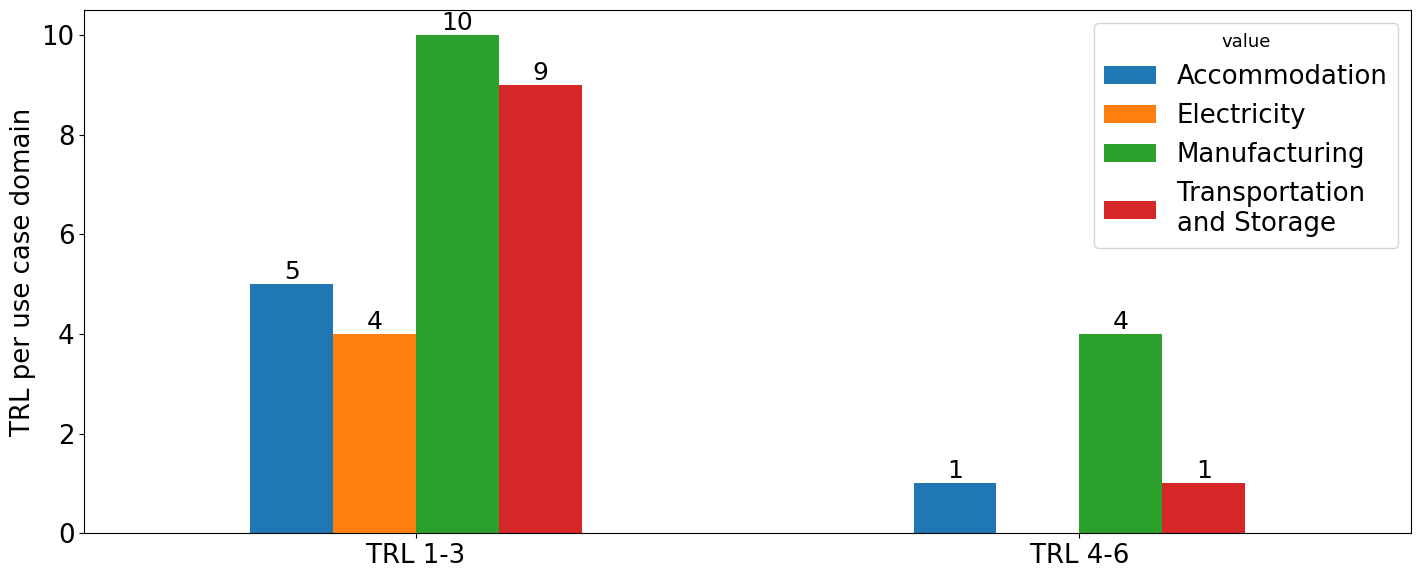

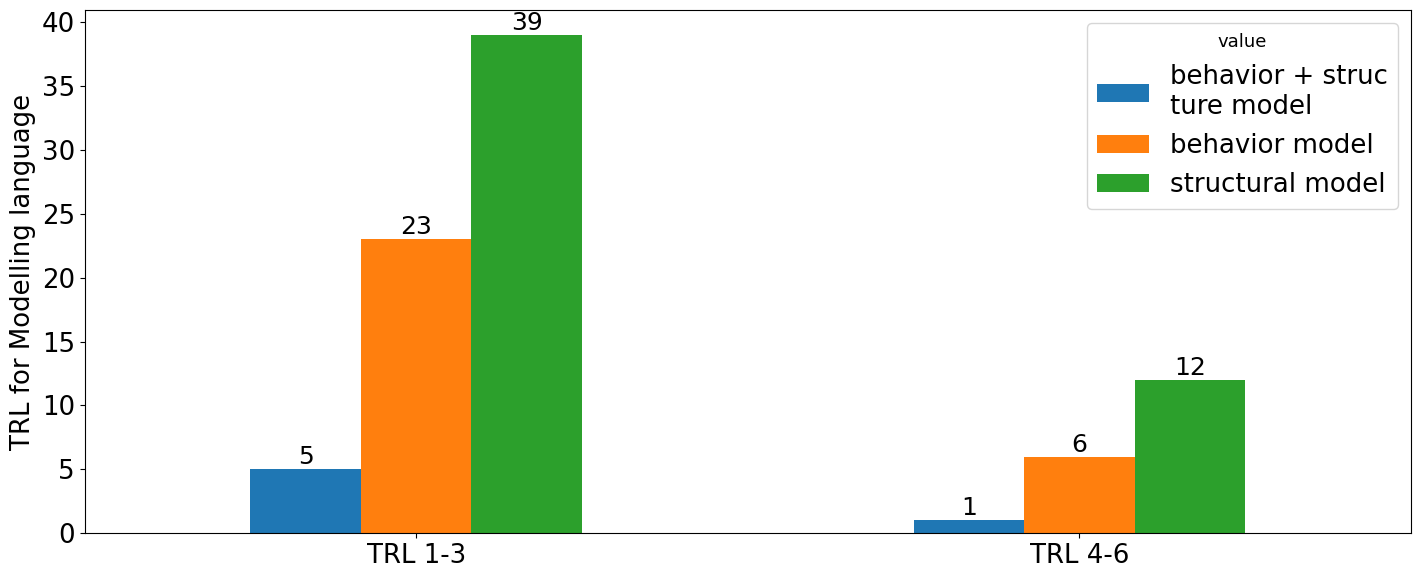

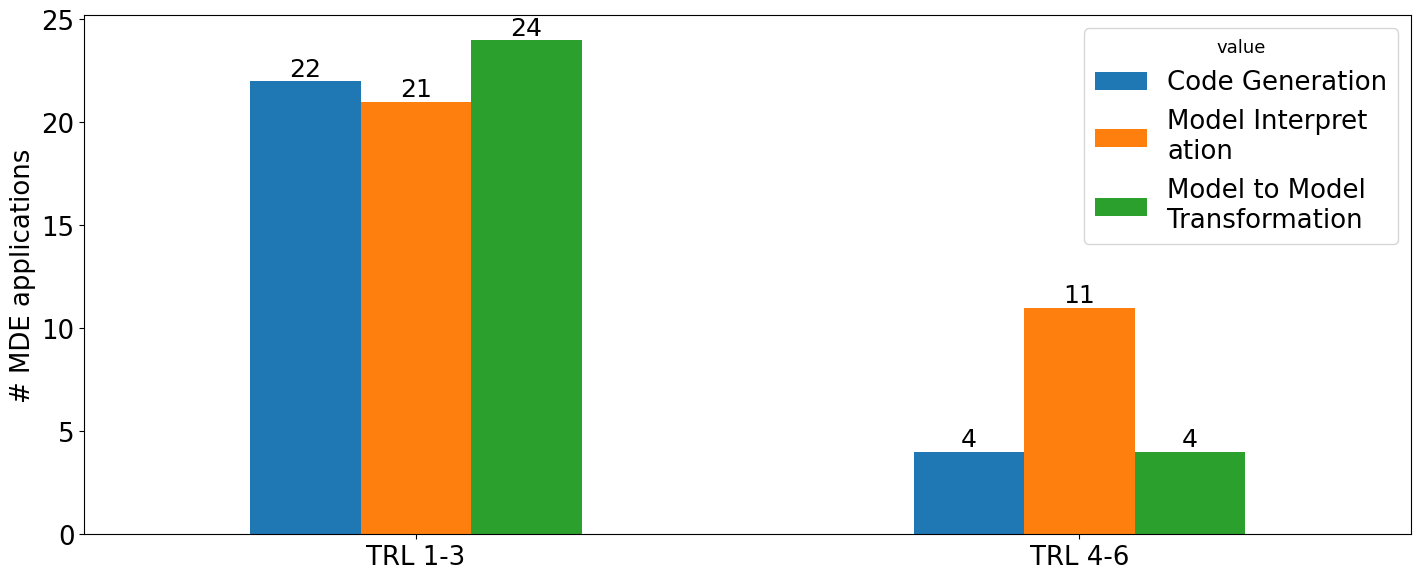

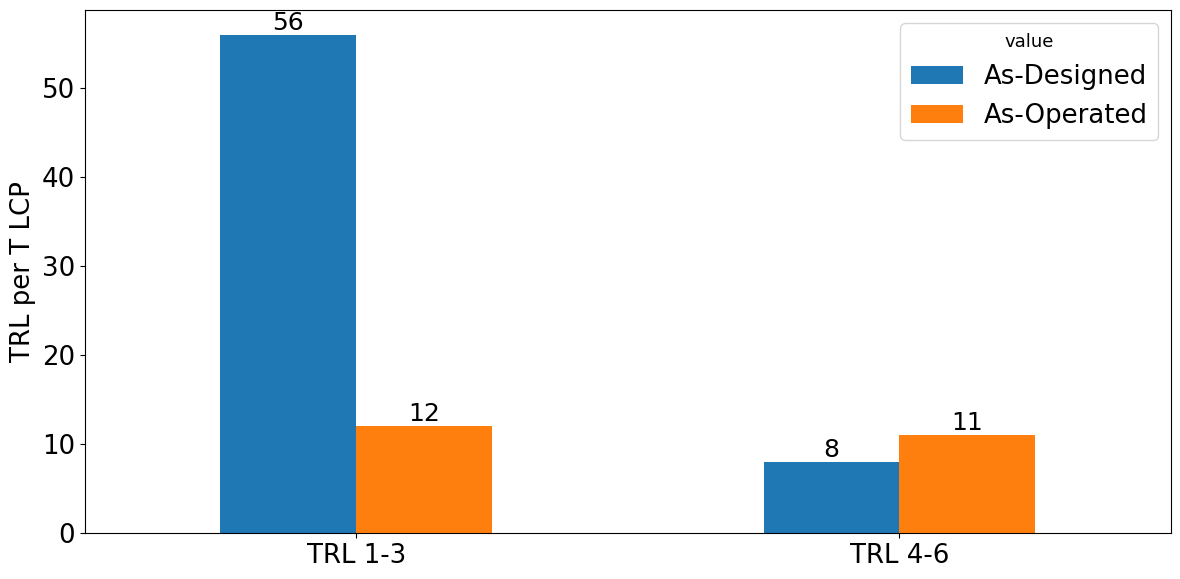

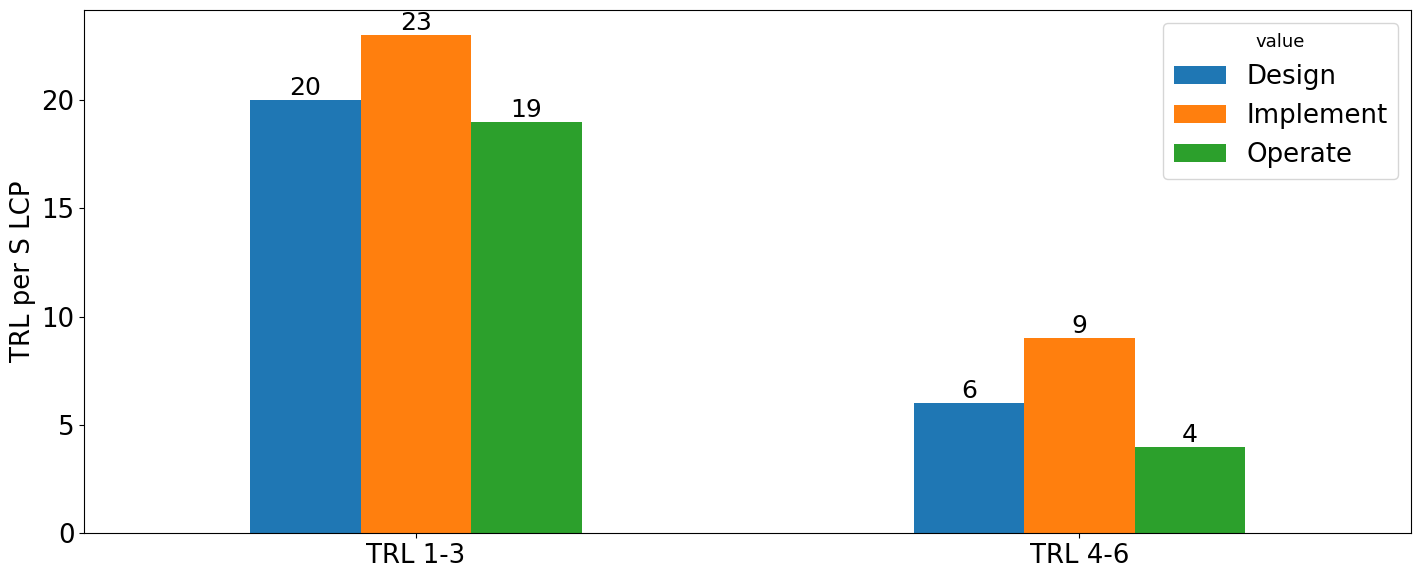

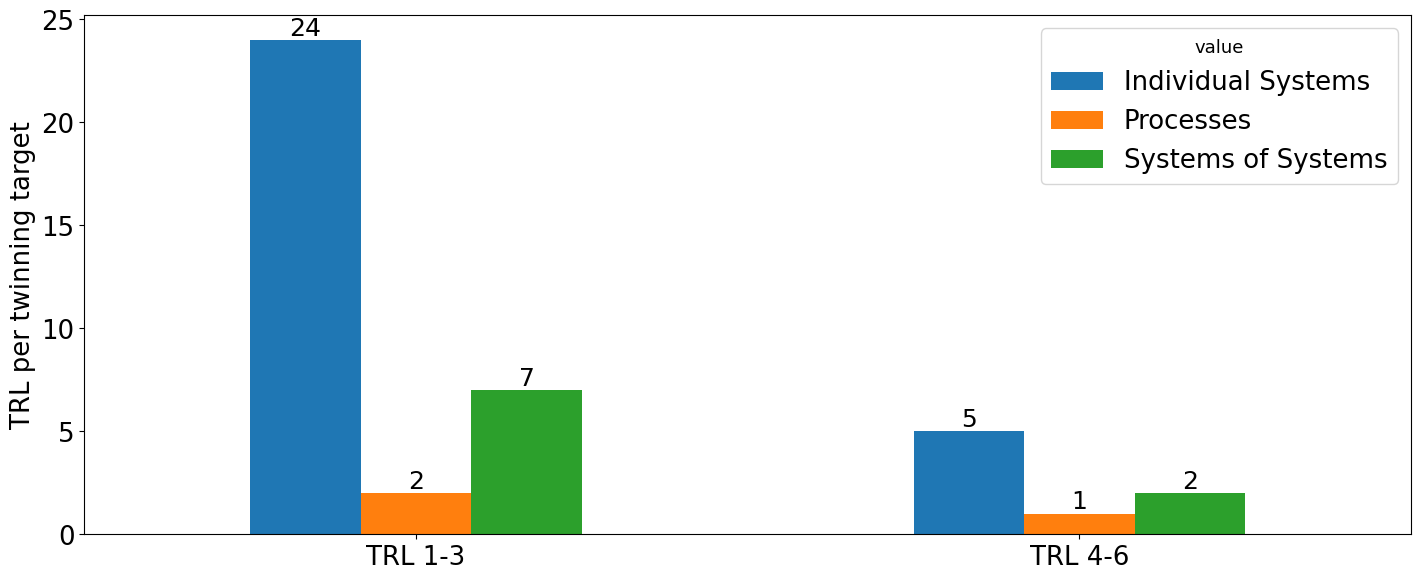

In [270]:
fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
domain_trl = domain_trl#.groupby(['value','trl']).filter(lambda x : len(x) > 1)

for text in domain_trl['value']:
    if text is not None:
        if len(text) > 15:
            domain_trl['value'] = domain_trl['value'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))
            #text = re.sub("(.{13})", "\\1\n", text, 0, re.DOTALL)
            
ax = domain_trl.groupby(['trl', 'value']).size().unstack().plot(kind='bar',rot=0, stacked=False, ax=axes, 
                                                                             ylabel="TRL per use case domain",  xlabel="")#title="TRL per domain",
#ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
label_pre = 0
dtrlList = domain_trl['value'].unique().tolist()
#dtrlList = dtrlList.sort()
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"Domain_TRL_barchart"+ fileformat)

#############################

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
modlang_trl = modlang_trl.groupby(['value','trl']).filter(lambda x : len(x) > 0)#.groupby(['value','trl']).filter(lambda x : len(x) > 1)
for text in modlang_trl['value']:
    if text is not None:
        if len(text) > 16:
            modlang_trl['value'] = modlang_trl['value'].replace(text, re.sub("(.{16})", "\\1\n", text, 0, re.DOTALL))

ax = modlang_trl.groupby(['trl', 'value']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="TRL for Modelling language",  xlabel="")#title="TRL per modelling language",
#ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"Language_TRL_barchart"+ fileformat)

#############################

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
mde_trl = mde_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)

for text in mde_trl['value']:
    if text is not None:
        if len(text) > 15:
            mde_trl['value'] = mde_trl['value'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))

ax = mde_trl.groupby(['trl', 'value']).size().unstack().plot(kind='bar',rot=0, stacked=False, ax=axes,
                                                                                     ylabel="# MDE applications",  xlabel="")#title="TRL per MDE technique",
#ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"TRL_MDE_barchart"+ fileformat)

#############################

fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
tlcp_trl = tlcp_trl#.groupby(['value','trl']).filter(lambda x : len(x) > 1)
indexlist = []
index = 0
for x in tlcp_trl['value']:
    if x is not None:
        if ";" in x:
            indexlist.append(index)
            #print(tlcp_trl.loc[index])
            values = tlcp_trl.loc[index]['value'].split(";")
            trl = tlcp_trl.loc[index]['trl']
            for val in values:
                new_line = pd.DataFrame([{"value": val, "trl": trl}])
                tlcp_trl = pd.concat([tlcp_trl, new_line], ignore_index=True)
    index += 1
tlcp_trl = tlcp_trl.drop(indexlist)
ax = tlcp_trl.groupby(['trl', 'value']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="TRL per T LCP",  xlabel="")#title="TRL per DT LCP",
#ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"TLCP_TRL_barchart"+ fileformat)

#############################

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
slcp_trl = slcp_trl.groupby(['value','trl']).filter(lambda x : len(x) > 2)
ax = slcp_trl.groupby(['trl', 'value']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                         ylabel="TRL per S LCP",  xlabel="")#title="TRL per S LCP",
#ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
#plt.title('# Distribution of MDE techniques amongst domains')
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"SLCP_TRL_barchart"+ fileformat)

############################
fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
tt_trl = tt_trl#.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = tt_trl.groupby(['trl', 'value']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="TRL per twinning target",  xlabel="")#title="TRL per modelling language",
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"TT_TRL_barchart"+ fileformat)

TODO: Design/Etc

# Stacked Barcharts with Domain per X

In [271]:
import re

C:\Users\ac130903\AppData\Local\Temp\ipykernel_29920\2920812237.py:62: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
C:\Users\ac130903\AppData\Local\Temp\ipykernel_29920\2920812237.py:83: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
C:\Users\ac130903\AppData\Local\Temp\ipykernel_29920\2920812237.py:105: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
se

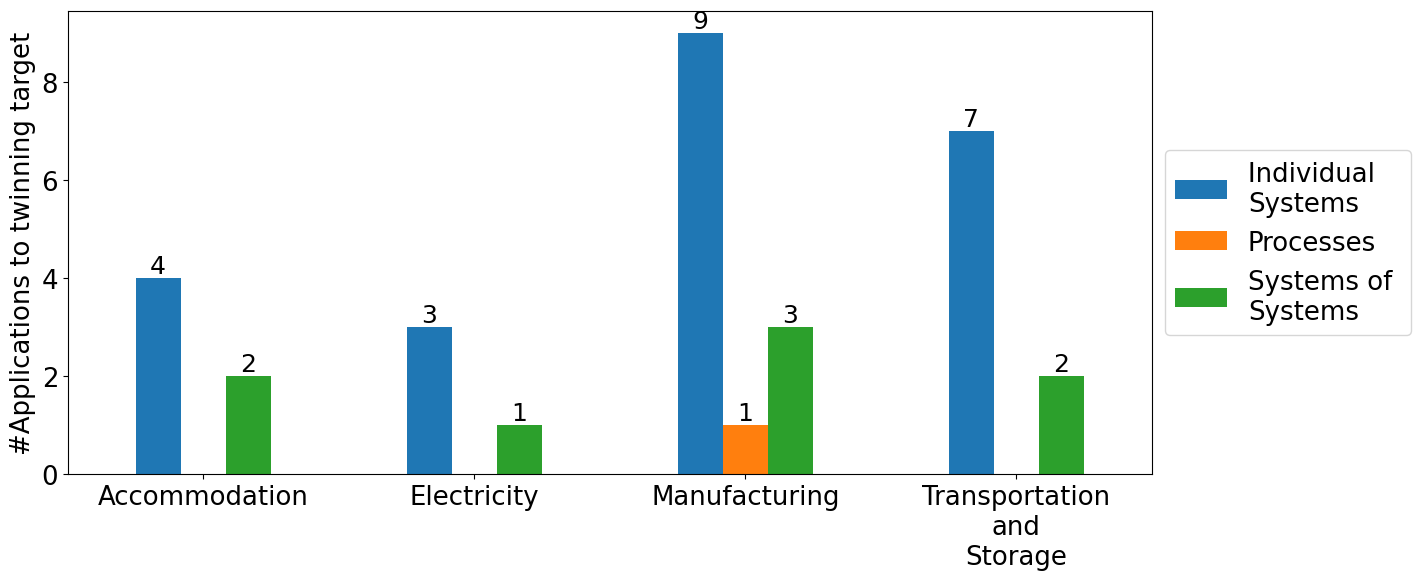

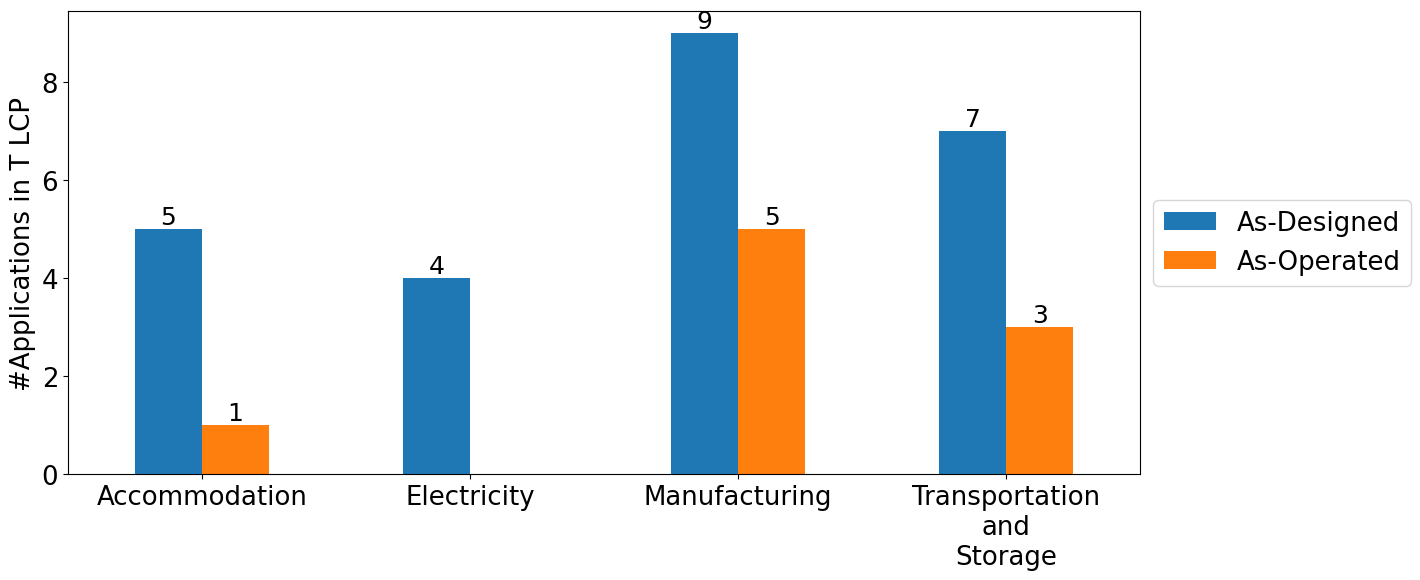

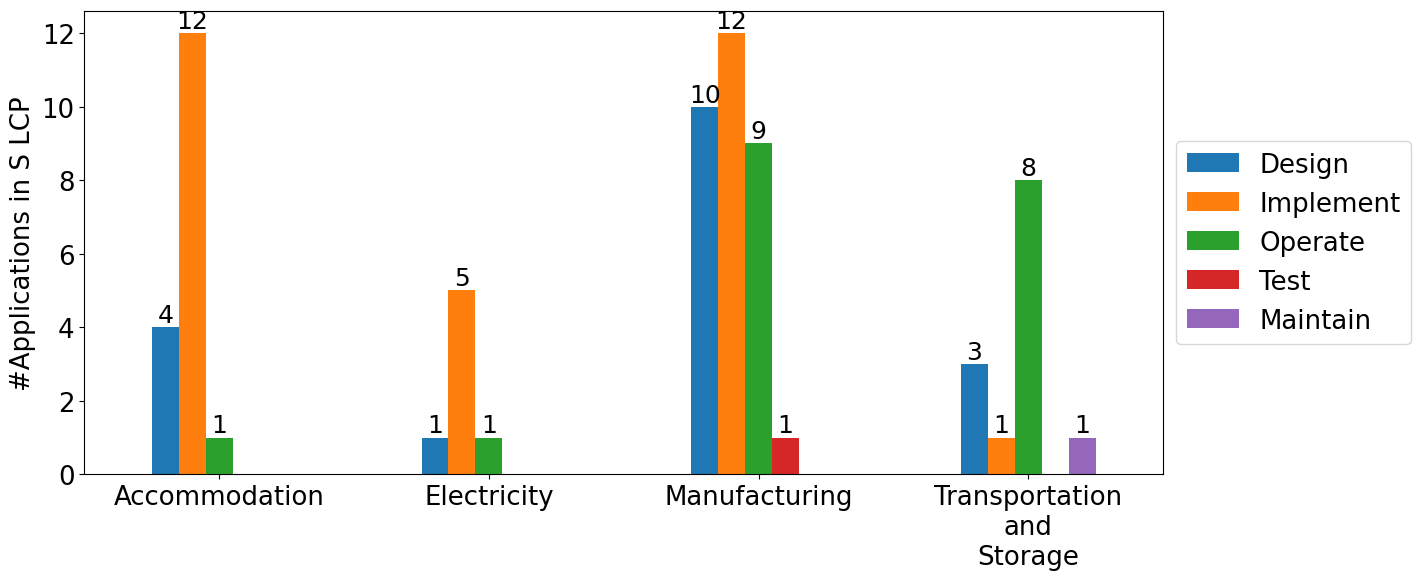

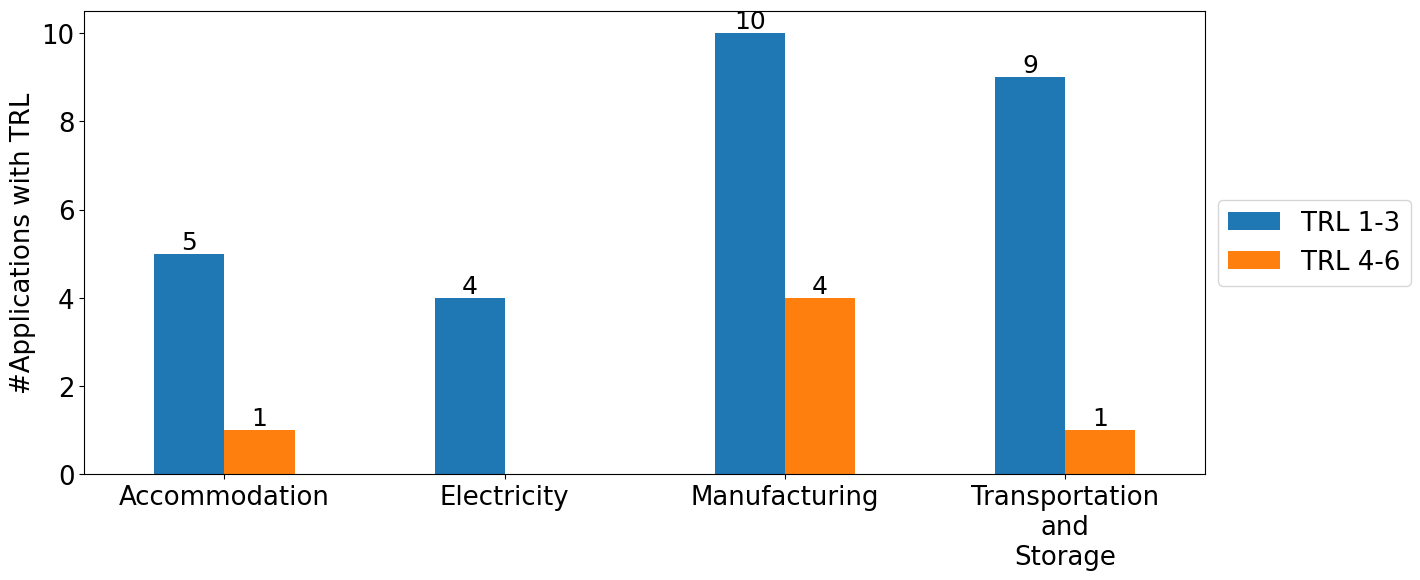

In [272]:
ucd_tt = pd.DataFrame(columns = ['value', 'use case domain'])
ucd_tlcp = pd.DataFrame(columns = ['value', 'use case domain'])
ucd_slcp = pd.DataFrame(columns = ['value', 'use case domain'])
ucd_trl = pd.DataFrame(columns = ['value', 'use case domain'])



with open("target/json/data_consolidated_semistructured__4.json", 'r') as json_file:
    data_semistr = json.load(json_file)
    
#print(data_semistr)
for title, contents in data_semistr.items():
    tlcp = contents["twin lifecycle phase"]
    tt = contents["twinning target"]
    trl = contents["Technological Readiness Level"]
    ucd = contents["use case domain"] if contents["use case domain"] in domains else None

    

    try:
        for index, mdeContents in contents["modelTrafos"].items():
            
            mdeContents = json.loads(mdeContents)
            slcp = mdeContents['system lifecycle phase']

            new_line = pd.DataFrame([{"value": slcp, 'use case domain': ucd}])
            ucd_slcp = pd.concat([ucd_slcp, new_line], ignore_index=True)
            
        new_line = pd.DataFrame([{"value": tt, 'use case domain': ucd}])
        ucd_tt = pd.concat([ucd_tt, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": trl, 'use case domain': ucd}])
        ucd_trl = pd.concat([ucd_trl, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": tlcp, 'use case domain': ucd}])
        ucd_tlcp = pd.concat([ucd_tlcp, new_line], ignore_index=True)
    except KeyError as err:
        continue

fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
ucd_tt = ucd_tt#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)

#for text in ucd_tt['use case domain']:
#    if text is not None:
#        if len(text) > 17:
#            ucd_tt['use case domain'] = ucd_tt['use case domain'].replace(text, re.sub("(.{17})", "\\1\n", text, 0, re.DOTALL))
ucd_tt['use case domain'].replace(' ', '\n', regex=True, inplace=True)

for text in ucd_tt['value']:
    if text is not None:
        if len(text) > 11:
            ucd_tt['value'] = ucd_tt['value'].replace(text, re.sub("(.{11})", "\\1\n", text, 0, re.DOTALL))

ax = ucd_tt.groupby(['use case domain','value']).size().unstack().plot(kind='bar',rot=0, stacked=False, ax=axes, 
                                                                             ylabel="#Applications to twinning target", xlabel="")#, title="domain tt"
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
label_pre = 0
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"Domain_TT_barchart"+ fileformat)


fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
#ucd_tlcp = ucd_tlcp.groupby(['use case domain','value'])
ucd_tlcp = ucd_tlcp#.filter(lambda x : len(x) > 0)#.groupby(['value','use case domain'])
#for text in ucd_tlcp['use case domain']:
#    if text is not None:
#        if len(text) > 17:
#            ucd_tlcp['use case domain'] = ucd_tlcp['use case domain'].replace(text, re.sub("(.{17})", "\\1\n", text, 0, re.DOTALL))
ucd_tlcp['use case domain'].replace(' ', '\n', regex=True, inplace=True)
ax = ucd_tlcp.groupby(['use case domain','value']).size().unstack().plot(kind='bar',rot=0, stacked=False, ax=axes, 
                                                                         ylabel="#Applications in T LCP",  xlabel="")#title="domain tlcp",
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"Domain_TLCP_barchart"+ fileformat)



fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
ucd_slcp = ucd_slcp#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)

#for text in ucd_slcp['use case domain']:
#    if text is not None:
#        if len(text) > 17:
#            ucd_slcp['use case domain'] = ucd_slcp['use case domain'].replace(text, re.sub("(.{17})", "\\1\n", text, 0, re.DOTALL))
ucd_slcp['use case domain'].replace(' ', '\n', regex=True, inplace=True)
ax = ucd_slcp.groupby(['use case domain','value']).size().unstack().plot(kind='bar',rot=0, stacked=False, ax=axes,
                                                                                     ylabel="#Applications in S LCP",  xlabel="")#title="domain slcp",
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)

plt.tight_layout()
plt.savefig(destination_folder+"Domain_SLCP_barchart"+ fileformat)



fig, axes = plt.subplots()
fig.set_figwidth(figwidth*1.2)
fig.set_figheight(figheight)
ucd_trl = ucd_trl#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)
#for text in ucd_trl['use case domain']:
#    if text is not None:
#        if len(text) > 17:
#            ucd_trl['use case domain'] = ucd_trl['use case domain'].replace(text, re.sub("(.{17})", "\\1\n", text, 0, re.DOTALL))
ucd_trl['use case domain'].replace(' ', '\n', regex=True, inplace=True)
ax = ucd_trl.groupby(['use case domain','value']).size().unstack().plot(kind='bar',rot=0, stacked=False, ax=axes,
                                                                                     ylabel="#Applications with TRL", xlabel="")# title="domain trl",
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
plt.tight_layout()
plt.savefig(destination_folder+"Domain_TRL_barchart"+ fileformat)

# Testing

C:\Users\ac130903\AppData\Local\Temp\ipykernel_29920\2169994395.py:52: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
C:\Users\ac130903\AppData\Local\Temp\ipykernel_29920\2169994395.py:71: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set the WRITEABLE flag True or make a copy immediately before writing.
  container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
C:\Users\ac130903\AppData\Local\Temp\ipykernel_29920\2169994395.py:93: DeprecationWarning: Numpy has detected that you (may be) writing to an array with
overlapping memory from np.broadcast_arrays. If this is intentional
set

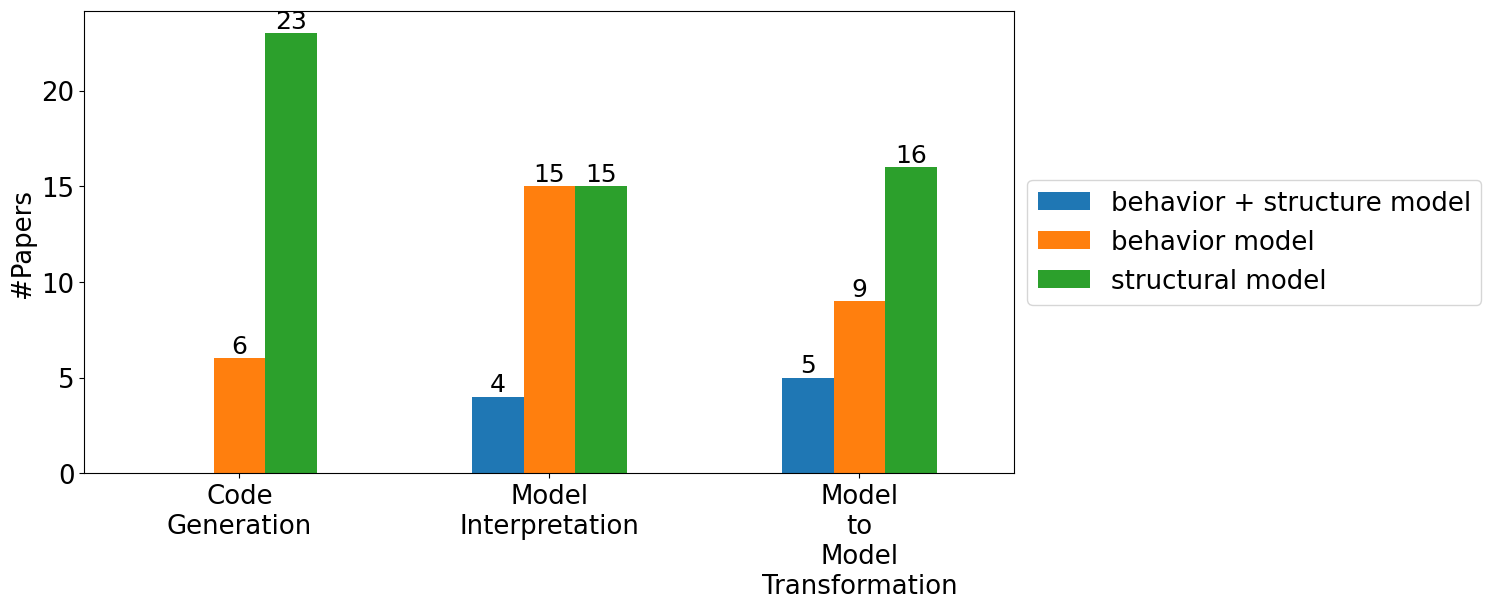

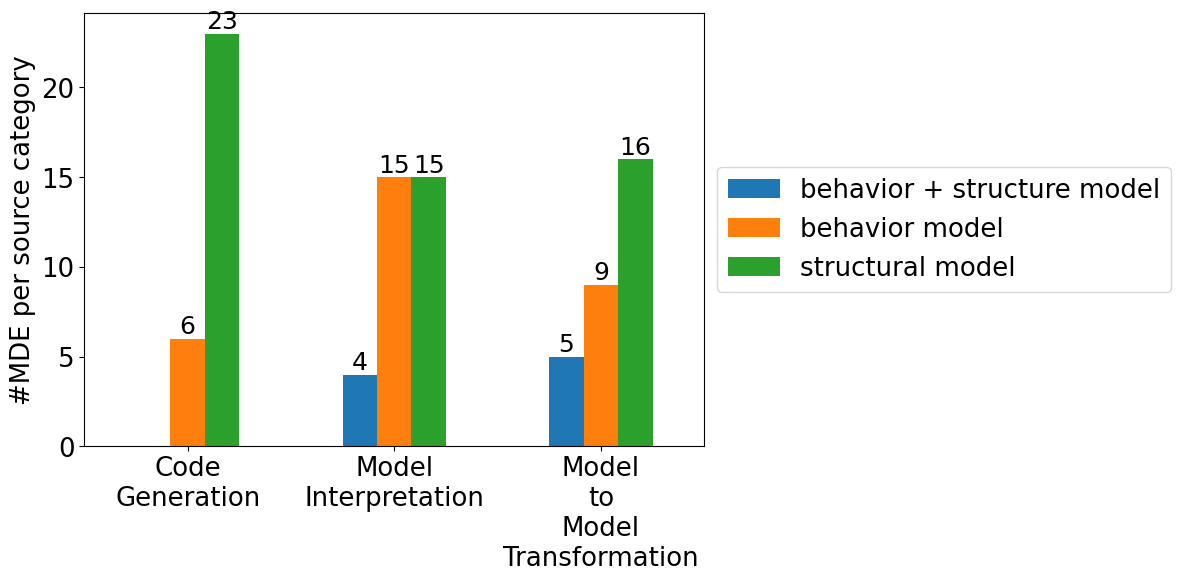

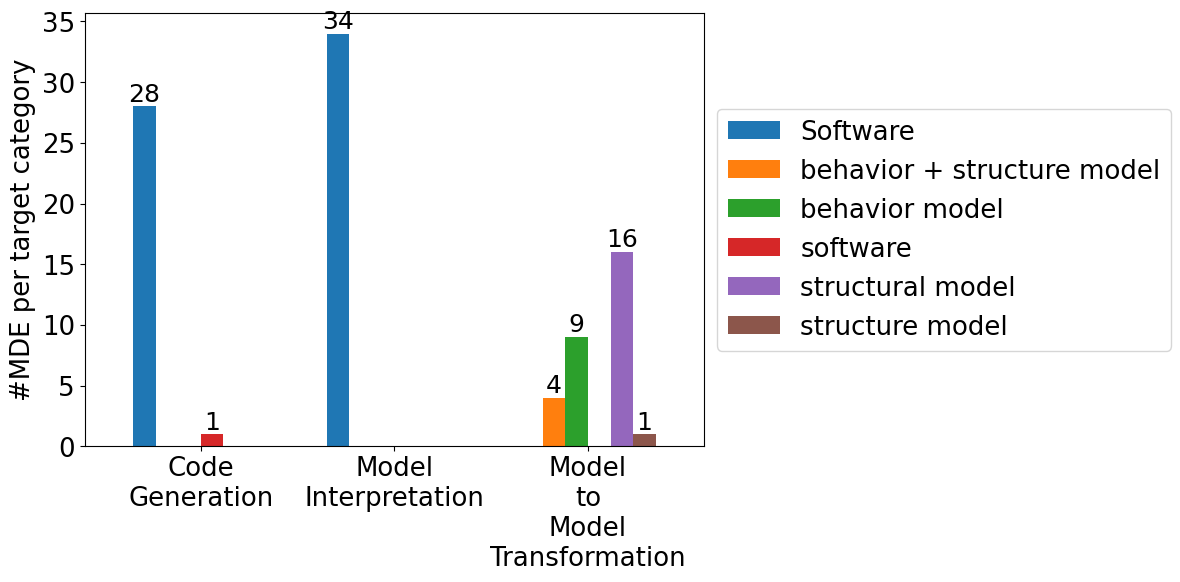

In [273]:
source_type = pd.DataFrame(columns = ['value', 'model processing technique'])
target_type = pd.DataFrame(columns = ['value', 'model processing technique'])
lang_type = pd.DataFrame(columns = ['value', 'model processing technique'])

with open("target/json/data_consolidated_semistructured__4.json", 'r') as json_file:
    data_semistr = json.load(json_file)
    
#print(data_semistr)
years = data["Publication Year"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    
    try:

        

        for index, mdeContents in contents["modelTrafos"].items():
            
            mdeContents = json.loads(mdeContents)
            modeltype1 = mdeContents['model processing technique']
            lang = mdeContents["source category"]
            #lang2 = mdeContents["target category"]

            new_line = pd.DataFrame([{"value": lang, 'model processing technique': modeltype1}])
            #new_line = pd.DataFrame([{"value": lang2, 'model processing technique': modeltype1}])
            lang_type = pd.concat([lang_type, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": mdeContents['source category'], 'model processing technique': modeltype1}])
            source_type = pd.concat([source_type, new_line], ignore_index=True)
            
            new_line = pd.DataFrame([{"value": mdeContents['target category'], 'model processing technique': modeltype1}])
            target_type = pd.concat([target_type, new_line], ignore_index=True)
    except KeyError as err:
        continue

fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
source_type = source_type#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)

#for text in source_type['model processing technique']:
#    if text is not None:
#        if len(text) > 12:
#            source_type['model processing technique'] = source_type['model processing technique'].replace(text, re.sub("(.{12})", "\\1\n", text, 0, re.DOTALL))
source_type['model processing technique'].replace(' ', '\n', regex=True, inplace=True)
ax = source_type.groupby(['model processing technique','value']).size().unstack().plot(kind='bar', stacked=False, ax=axes, rot= 0,
                                                                             ylabel="#Papers",  xlabel="")#title="Distribution of MDE techniques over the years",
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
#plt.title('Distribution of MDE techniques over the years')
label_pre = 0
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)


fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
lang_type = lang_type
lang_type = lang_type#.filter(lambda x : len(x) > 1).groupby(['value','Publication Year'])
#for text in lang_type['model processing technique']:
#    if text is not None:
#        if len(text) > 14:
#            lang_type['model processing technique'] = lang_type['model processing technique'].replace(text, re.sub("(.{14})", "\\1\n", text, 0, re.DOTALL))
lang_type['model processing technique'].replace(' ', '\n', regex=True, inplace=True)
ax = lang_type.groupby(['model processing technique','value']).size().unstack().plot(kind='bar', stacked=False, ax=axes, rot= 0,
                                                                         ylabel="#MDE per source category",  xlabel="")#title="Distribution of MDE techniques amongst domains",
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
#plt.title('Distribution of modelling languages over the years')
plt.tight_layout()
plt.savefig(destination_folder+"source And MDE technique"+ fileformat)



fig, axes = plt.subplots()
fig.set_figwidth(figwidth)
fig.set_figheight(figheight)
target_type = target_type#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)
#for text in target_type['model processing technique']:
#    if text is not None:
#        if len(text) > 14:
#            target_type['model processing technique'] = target_type['model processing technique'].replace(text, re.sub("(.{14})", "\\1\n", text, 0, re.DOTALL))
target_type['model processing technique'].replace(' ', '\n', regex=True, inplace=True)
ax = target_type.groupby(['model processing technique','value']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="#MDE per target category",  xlabel="", width=0.7)#title="Distribution of model types over the years",
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    for i in range(len(container.datavalues)):
        container.datavalues[i] = np.nan if container.datavalues[i] == 0 else container.datavalues[i]
    ax.bar_label(container, fontsize=barlabelsize)
#plt.title('Distribution of model types over the years')
plt.tight_layout()
plt.savefig(destination_folder+"target And MDE technique"+ fileformat)

# Source / Target

# heat map

source_tt = pd.DataFrame(columns = ['value', 'source category'])
source_tlcp = pd.DataFrame(columns = ['value', 'source category'])
source_slcp = pd.DataFrame(columns = ['value', 'source category'])
source_trl = pd.DataFrame(columns = ['value', 'source category'])
source_domain = pd.DataFrame(columns = ['value', 'source category'])

target_tt = pd.DataFrame(columns = ['value', 'target category'])
target_tlcp = pd.DataFrame(columns = ['value', 'target category'])
target_slcp = pd.DataFrame(columns = ['value', 'target category'])
target_trl = pd.DataFrame(columns = ['value', 'target category'])
target_domain = pd.DataFrame(columns = ['value', 'target category'])

with open("target/json/data_consolidated_semistructured__4.json", 'r') as json_file:
    data_semistr = json.load(json_file)
    
#print(data_semistr)
years = data["Publication Year"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    

    tlcp = contents["twin lifecycle phase"]
    tt = contents["twinning target"]
    trl = contents["Technological Readiness Level"]
    ucd = contents["use case domain"]

    try:
        for index, mdeContents in contents["modelTrafos"].items():
            
            mdeContents = json.loads(mdeContents)
            lang = mdeContents["modeling language"]
            sauce = mdeContents['source category']
            target = mdeContents['target category']
            slcp = mdeContents['system lifecycle phase']
            
            new_line = pd.DataFrame([{"value": tt, 'source category': sauce}])
            source_tt = pd.concat([source_tt, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": tlcp, 'source category': sauce}])
            source_tlcp = pd.concat([source_tlcp, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": slcp, 'source category': sauce}])
            source_slcp = pd.concat([source_slcp, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": trl, 'source category': sauce}])
            source_trl = pd.concat([source_trl, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": ucd, 'source category': sauce}])
            source_domain = pd.concat([source_domain, new_line], ignore_index=True)


            new_line = pd.DataFrame([{"value": tt, 'target category': target}])
            target_tt = pd.concat([target_tt, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": tlcp, 'target category': target}])
            target_tlcp = pd.concat([target_tlcp, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": slcp, 'target category': target}])
            target_slcp = pd.concat([target_slcp, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": trl, 'target category': target}])
            target_trl = pd.concat([target_trl, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": ucd, 'target category': target}])
            target_domain = pd.concat([target_domain, new_line], ignore_index=True)
    except KeyError as err:
        continue

y = [1] * len(source_tt['source category'].unique())
y2 = [1] * len(target_tt['target category'].unique())
targd_size = target_tt.groupby(['target category', 'value']).size()
line = []
#print(targd_size['architecture model']['Individual Systems'])
for targd in target_tt['target category'].unique().tolist():
        print(targd)
        try:
            line.append(targd_size[targd]['Individual Systems'])
        except Exception as err :
            line.append(0)
        try:
            line.append(targd_size[targd]['Systems of Systems'])
        except Exception as err :
            line.append(0)
        try:
            line.append(targd_size[targd]['Processes'])
        except Exception as err :
            line.append(0)

#print(source_tt.groupby(['source category', 'value']).size())

print(len(line))
print(targd_size)
print(np.array(line).reshape((3,8)))